In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [44]:
#load joined data
df = pd.read_csv('data/joined_data.csv')

In [45]:
df.head()

,brand,name,phone_storage,scrapeday,price_digitec_CHF,rating_digitec,delivery_time_days_digitec,cleaned_phone_name,model,storage,price_mediamarkt_CHF,rating_mediamarkt,delivery_time_days_mediamarkt
0,ASUS,ROG Phone 7,256,af,921.0,3.4,1,ROG Phone 7,ROG Phone 7,256,1015.500,4.5000,1.0
1,ASUS,ROG Phone 7,256,bf,909.0,3.4,1,ROG Phone 7,ROG Phone 7,256,1012.655,4.5000,5.0
2,ASUS,ROG Phone 7,256,cm,999.0,3.4,1,ROG Phone 7,ROG Phone 7,256,1048.460,4.5000,4.0
3,ASUS,ROG Phone 7,512,af,1079.0,4.5,1,ROG Phone 7,ROG Phone 7,512,1133.650,4.8269,2.0
4,ASUS,ROG Phone 7,512,bf,999.5,4.5,1,ROG Phone 7,ROG Phone 7,512,1156.910,4.8200,4.0


In [46]:
#save the top 10 brands in a list
top_brands_ls = df["brand"].value_counts().reset_index()["brand"].head(10).to_list()

#create df with only the top 10 brands
df_top_brands = df[df["brand"].isin(top_brands_ls)].copy()

# 1. Frage: Wie stehen die Preise der einzelnen Marken zueinander, bei welchen Marken gibt es die grössten und kleinsten Preisunterschiede?

In [47]:
#aggregate the data
df_agg = df.groupby(['brand'], as_index=False).agg({'price_digitec_CHF': ['mean', 'min', 'max'],
                                                   'price_mediamarkt_CHF': ['mean', 'min', 'max']})

df_agg

brand price_digitec_CHF                          price_mediamarkt_CHF  \
                           mean         min          max                 mean   
0       APPLE        908.292356  168.000000  1539.862500           967.215569   
1        ASUS        868.887843  555.886667  1349.000000          1142.497647   
2   BLACKVIEW        283.066667   74.000000   470.000000           320.578556   
3         CAT        366.500000  222.000000   444.000000           384.065000   
4        DORO        318.000000  318.000000   318.000000           285.270000   
5     EMPORIA        173.000000  173.000000   173.000000           191.120000   
6   FAIRPHONE        628.888889  628.666667   629.000000           669.850000   
7     GIGASET        221.852000  112.000000   261.400000           225.448000   
8      GOOGLE        619.281275  349.000000  1076.193333           668.972343   
9      HAMMER        231.900000  231.900000   231.900000           195.226667   
10      HONOR        359.712826  151.000000   898.500000           389.452101   
11     HUAWEI        629.933333  207.000000  2197.000000           652.391875   
12         LG        130.000000  130.000000   130.000000           303.690000   
13   MOTOROLA        292.797037   85.475000   832.000000           315.683076   
14      NOKIA        222.667073  110.000000   512.500000           227.466098   
15    NOTHING        441.058824  324.000000   602.500000           478.269412   
16     REALME        220.425705   76.700000   416.000000           245.293077   
17    SAMSUNG        746.976951  119.666667  1732.613333           849.869727   
18       SONY        782.793556  392.500000  1025.666667           927.037333   
19    ULEFONE        163.296296  138.000000   192.000000           178.145000   
20     XIAOMI        289.376622   78.750000  1259.000000           311.617393   
21        ZTE        151.217500   54.400000   399.000000           135.982833   

                         
           min      max  
0   464.238333  1640.04  
1   564.390000  1453.37  
2   161.010000   477.73  
3   217.370000   506.65  
4   278.920000   288.62  
5   191.120000   191.12  
6   660.900000   674.74  
7   216.520000   231.66  
8   132.320000  1118.78  
9   186.900000   211.65  
10  167.933333   945.98  
11  193.060000  2006.86  
12  303.690000   303.69  
13   84.120000   849.50  
14   81.900000   536.33  
15  320.520000   602.26  
16   78.210000   541.65  
17  130.060000  1833.10  
18  802.730000  1303.84  
19  132.080000   226.65  
20   72.480000  1446.98  
21   53.060000   244.88

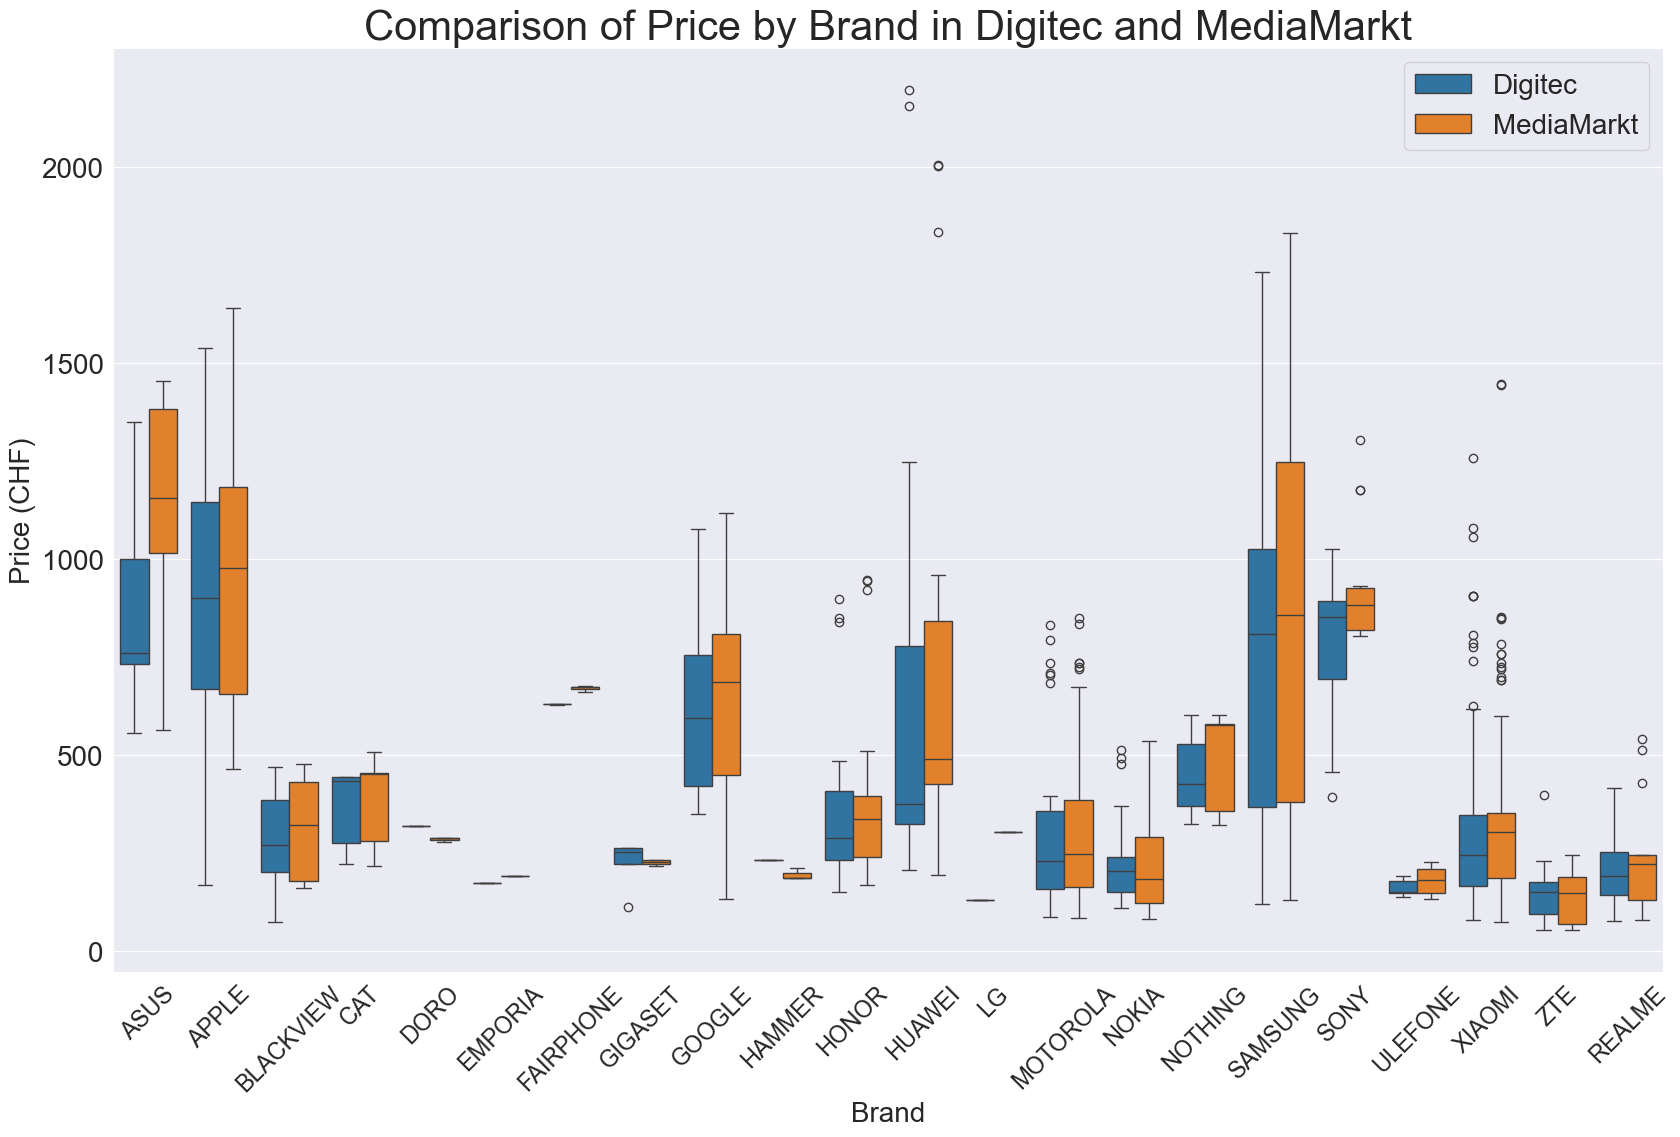

In [74]:
# Melting the DataFrame to get a long format suitable for seaborn boxplot
melted_prices = df.melt(id_vars=['brand'], 
                                value_vars=['price_digitec_CHF', 'price_mediamarkt_CHF'],
                                var_name='Store', 
                                value_name='Price')

# Replacing the column names for better readability in the plot
melted_prices['Store'] = melted_prices['Store'].replace({'price_digitec_CHF': 'Digitec', 'price_mediamarkt_CHF': 'MediaMarkt'})

# Creating the grouped boxplots
plt.figure(figsize=(20, 12))
sns.boxplot(x='brand', y='Price', hue='Store', data=melted_prices)

# Enhancing the plot
plt.title('Comparison of Price by Brand in Digitec and MediaMarkt', fontsize=30)
plt.xticks(rotation=45, fontsize=17)
plt.xlabel('Brand', fontsize=20)
plt.ylabel('Price (CHF)', fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

# Display the plot
plt.show()

In [49]:
#calculate the difference between mediamarkt and digitec prices
df_agg["price_diff_mean"] = df_agg["price_digitec_CHF"]["mean"] - df_agg["price_mediamarkt_CHF"]["mean"]
df_agg["price_diff_min"] = df_agg["price_digitec_CHF"]["min"] - df_agg["price_mediamarkt_CHF"]["min"]
df_agg["price_diff_max"] = df_agg["price_digitec_CHF"]["max"] - df_agg["price_mediamarkt_CHF"]["max"]

df_agg

brand price_digitec_CHF                          price_mediamarkt_CHF  \
                           mean         min          max                 mean   
0       APPLE        908.292356  168.000000  1539.862500           967.215569   
1        ASUS        868.887843  555.886667  1349.000000          1142.497647   
2   BLACKVIEW        283.066667   74.000000   470.000000           320.578556   
3         CAT        366.500000  222.000000   444.000000           384.065000   
4        DORO        318.000000  318.000000   318.000000           285.270000   
5     EMPORIA        173.000000  173.000000   173.000000           191.120000   
6   FAIRPHONE        628.888889  628.666667   629.000000           669.850000   
7     GIGASET        221.852000  112.000000   261.400000           225.448000   
8      GOOGLE        619.281275  349.000000  1076.193333           668.972343   
9      HAMMER        231.900000  231.900000   231.900000           195.226667   
10      HONOR        359.712826  151.000000   898.500000           389.452101   
11     HUAWEI        629.933333  207.000000  2197.000000           652.391875   
12         LG        130.000000  130.000000   130.000000           303.690000   
13   MOTOROLA        292.797037   85.475000   832.000000           315.683076   
14      NOKIA        222.667073  110.000000   512.500000           227.466098   
15    NOTHING        441.058824  324.000000   602.500000           478.269412   
16     REALME        220.425705   76.700000   416.000000           245.293077   
17    SAMSUNG        746.976951  119.666667  1732.613333           849.869727   
18       SONY        782.793556  392.500000  1025.666667           927.037333   
19    ULEFONE        163.296296  138.000000   192.000000           178.145000   
20     XIAOMI        289.376622   78.750000  1259.000000           311.617393   
21        ZTE        151.217500   54.400000   399.000000           135.982833   

                        price_diff_mean price_diff_min price_diff_max  
           min      max                                                
0   464.238333  1640.04      -58.923213    -296.238333    -100.177500  
1   564.390000  1453.37     -273.609804      -8.503333    -104.370000  
2   161.010000   477.73      -37.511889     -87.010000      -7.730000  
3   217.370000   506.65      -17.565000       4.630000     -62.650000  
4   278.920000   288.62       32.730000      39.080000      29.380000  
5   191.120000   191.12      -18.120000     -18.120000     -18.120000  
6   660.900000   674.74      -40.961111     -32.233333     -45.740000  
7   216.520000   231.66       -3.596000    -104.520000      29.740000  
8   132.320000  1118.78      -49.691069     216.680000     -42.586667  
9   186.900000   211.65       36.673333      45.000000      20.250000  
10  167.933333   945.98      -29.739275     -16.933333     -47.480000  
11  193.060000  2006.86      -22.458542      13.940000     190.140000  
12  303.690000   303.69     -173.690000    -173.690000    -173.690000  
13   84.120000   849.50      -22.886039       1.355000     -17.500000  
14   81.900000   536.33       -4.799024      28.100000     -23.830000  
15  320.520000   602.26      -37.210588       3.480000       0.240000  
16   78.210000   541.65      -24.867372      -1.510000    -125.650000  
17  130.060000  1833.10     -102.892776     -10.393333    -100.486667  
18  802.730000  1303.84     -144.243778    -410.230000    -278.173333  
19  132.080000   226.65      -14.848704       5.920000     -34.650000  
20   72.480000  1446.98      -22.240771       6.270000    -187.980000  
21   53.060000   244.88       15.234667       1.340000     154.120000

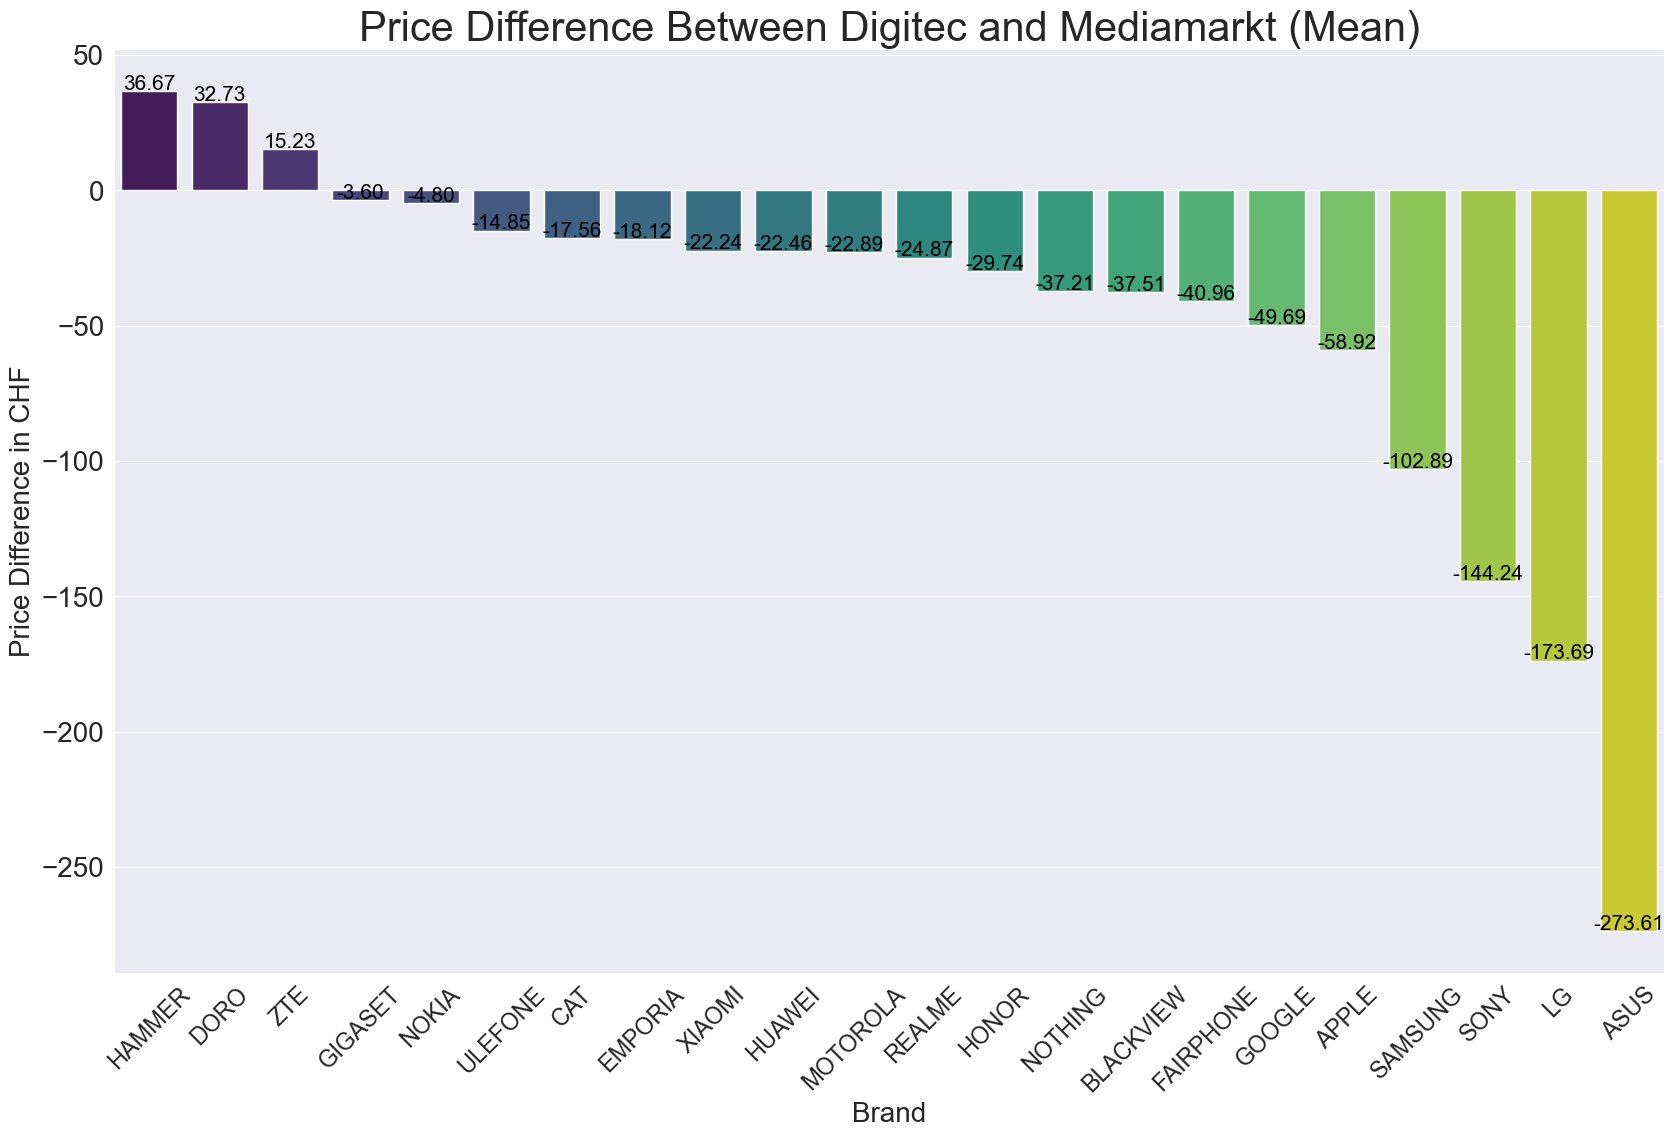

In [75]:
df_agg_sorted = df_agg.sort_values('price_diff_mean', ascending=False)

#plot the price difference
plt.figure(figsize=(20, 12))
barplot = sns.barplot(x=df_agg_sorted.brand, y='price_diff_mean', data=df_agg_sorted, palette="viridis")
plt.title('Price Difference Between Digitec and Mediamarkt (Mean)', fontsize=30)
plt.xlabel('Brand', fontsize=20)
plt.ylabel('Price Difference in CHF', fontsize=20)
plt.xticks(rotation=45, fontsize=17)
plt.yticks(fontsize=20)

# Adding value labels
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     fontsize=15,
                     color='black', 
                     xytext=(0, 5), 
                     textcoords='offset points')

plt.show()

# 2. Frage: Wie stehen die Bewertungen der einzelnen Marken zueinander, welche Marken erreichen in welchem Markt bessere Bewertungen?

In [51]:
#convert rating to numeric
df['rating_digitec'] = pd.to_numeric(df['rating_digitec'], errors='coerce')

#drop the rows with 0 star ratings (contain NA in digitect, 0 in mediamarkt)
df_ratings = df.dropna(subset=['rating_digitec']).copy()
df_ratings = df_ratings[df_ratings['rating_mediamarkt'] >= 1].copy()

In [52]:
ratings_grouped = df_ratings.groupby(['brand'], as_index=False).aggregate(
    rating_digitec_mean=('rating_digitec', 'mean'),
    rating_digitec_min=('rating_digitec', 'min'),
    rating_digitec_max=('rating_digitec', 'max'),
    rating_mediamarkt_mean=('rating_mediamarkt', 'mean'),
    rating_mediamarkt_min=('rating_mediamarkt', 'min'),
    rating_mediamarkt_max=('rating_mediamarkt', 'max')
)

ratings_grouped

,brand,rating_digitec_mean,rating_digitec_min,rating_digitec_max,rating_mediamarkt_mean,rating_mediamarkt_min,rating_mediamarkt_max
0,APPLE,4.614384,4.0,4.8,4.638122,2.382350,4.904300
1,ASUS,4.288235,3.4,4.6,4.566400,4.400000,4.826900
2,CAT,3.875000,3.5,4.3,3.625000,2.500000,4.000000
3,FAIRPHONE,4.566667,4.5,4.6,4.444444,3.333333,5.000000
4,GIGASET,4.640000,4.1,5.0,4.536900,4.458700,4.654200
5,GOOGLE,4.310000,4.1,4.5,4.343635,3.270675,5.000000
6,HONOR,4.211111,3.2,5.0,4.098325,2.000000,5.000000
7,HUAWEI,4.038889,3.0,4.8,3.725842,1.000000,5.000000
8,LG,4.200000,4.2,4.2,3.873950,3.571400,4.176500
9,MOTOROLA,4.108696,3.7,5.0,3.416270,1.666667,5.000000


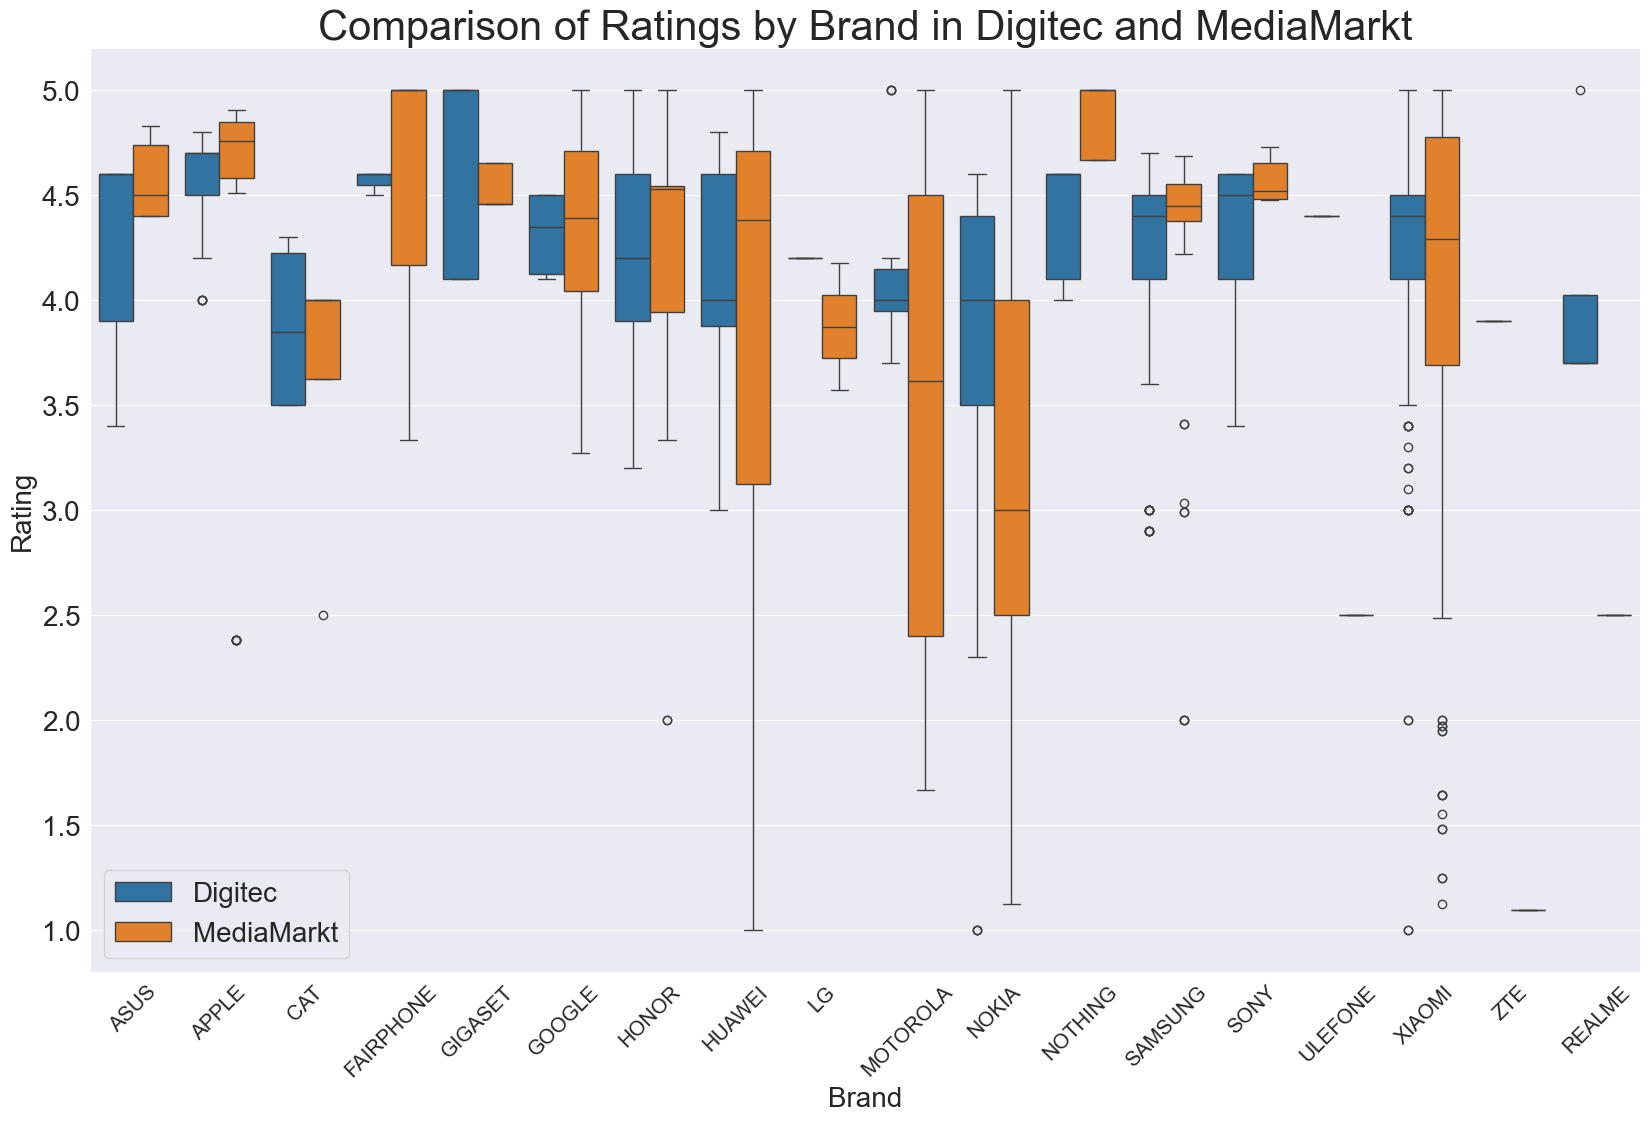

In [53]:
# Melting the DataFrame to get a long format suitable for seaborn boxplot
melted_ratings = df_ratings.melt(id_vars=['brand'], 
                                value_vars=['rating_digitec', 'rating_mediamarkt'],
                                var_name='Store', 
                                value_name='Rating')

# Replacing the column names for better readability in the plot
melted_ratings['Store'] = melted_ratings['Store'].replace({'rating_digitec': 'Digitec', 'rating_mediamarkt': 'MediaMarkt'})

# Creating the grouped boxplots
plt.figure(figsize=(20, 12))
sns.boxplot(x='brand', y='Rating', hue='Store', data=melted_ratings)

# Enhancing the plot
plt.title('Comparison of Ratings by Brand in Digitec and MediaMarkt', fontsize=30)
plt.xticks(rotation=45, fontsize=15)
plt.xlabel('Brand', fontsize=20)
plt.ylabel('Rating', fontsize=20)
plt.legend(loc="lower left", fontsize=20)
plt.yticks(fontsize=20)

# Display the plot
plt.show()

In [54]:
#in which brands do the ratings differ the most?
ratings_grouped["rating_diff_mean"] = abs(ratings_grouped["rating_digitec_mean"] - ratings_grouped["rating_mediamarkt_mean"])

#have a look at the ratings difference in desc order
ratings_grouped.sort_values(by="rating_diff_mean", ascending=False)

,brand,rating_digitec_mean,rating_digitec_min,rating_digitec_max,rating_mediamarkt_mean,rating_mediamarkt_min,rating_mediamarkt_max,rating_diff_mean
17,ZTE,3.900000,3.9,3.9,1.093333,1.093333,1.093333,2.806667
15,ULEFONE,4.400000,4.4,4.4,2.500000,2.500000,2.500000,1.900000
12,REALME,4.025000,3.7,5.0,2.500000,2.500000,2.500000,1.525000
9,MOTOROLA,4.108696,3.7,5.0,3.416270,1.666667,5.000000,0.692426
11,NOTHING,4.447059,4.0,4.6,4.901962,4.666650,5.000000,0.454903
8,LG,4.200000,4.2,4.2,3.873950,3.571400,4.176500,0.326050
14,SONY,4.253333,3.4,4.6,4.571300,4.475800,4.729700,0.317967
7,HUAWEI,4.038889,3.0,4.8,3.725842,1.000000,5.000000,0.313047
10,NOKIA,3.512500,1.0,4.6,3.218750,1.125000,5.000000,0.293750
1,ASUS,4.288235,3.4,4.6,4.566400,4.400000,4.826900,0.278165


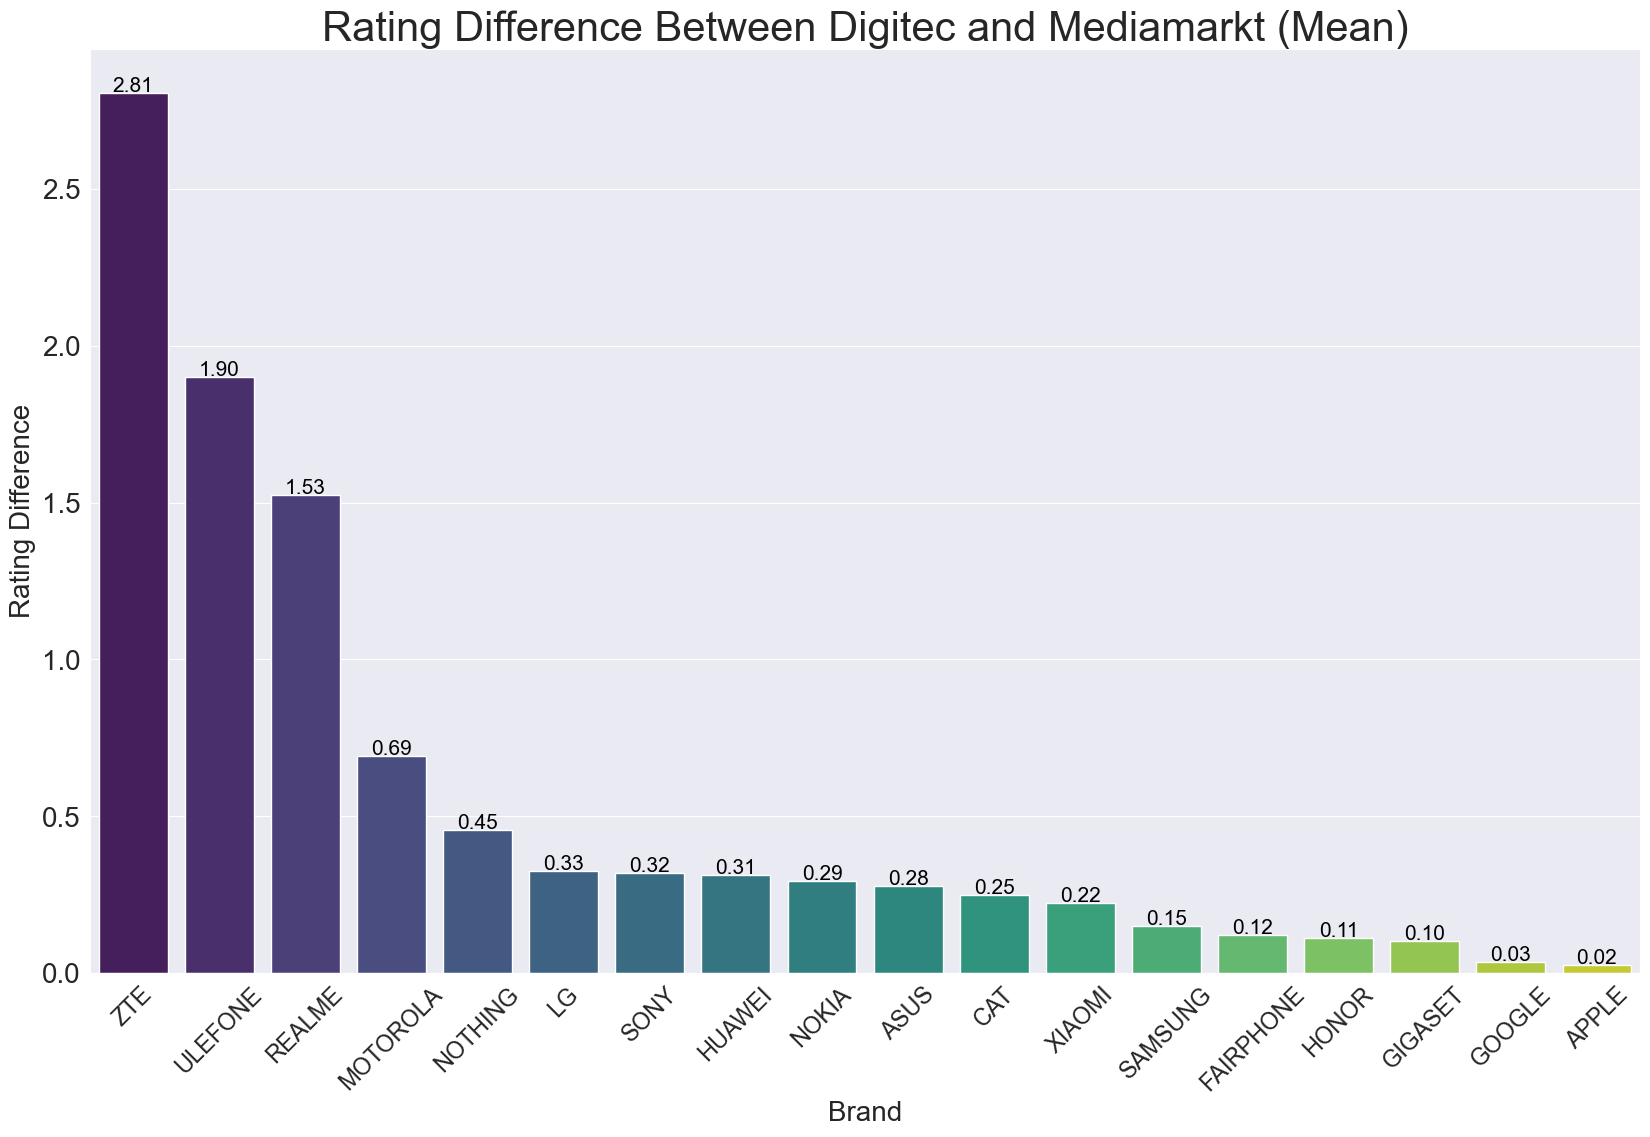

In [77]:
ratings_grouped_sorted = ratings_grouped.sort_values('rating_diff_mean', ascending=False)

#plot the rating difference
plt.figure(figsize=(20, 12))
barplot = sns.barplot(x=ratings_grouped_sorted.brand, y='rating_diff_mean', data=ratings_grouped_sorted, palette="viridis")
plt.title('Rating Difference Between Digitec and Mediamarkt (Mean)', fontsize=30)
plt.xlabel('Brand', fontsize=20)
plt.ylabel('Rating Difference', fontsize=20)
plt.xticks(rotation=45, fontsize=17)
plt.yticks(fontsize=20)

# Adding value labels
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     fontsize=15,
                     color='black', 
                     xytext=(0, 5), 
                     textcoords='offset points')

plt.show()

# 3. Frage: Wie entwickeln sich die Preise während und nach Black Friday?

In [56]:
df

,brand,name,phone_storage,scrapeday,price_digitec_CHF,rating_digitec,delivery_time_days_digitec,cleaned_phone_name,model,storage,price_mediamarkt_CHF,rating_mediamarkt,delivery_time_days_mediamarkt
0,ASUS,ROG Phone 7,256,af,921.0,3.4,1,ROG Phone 7,ROG Phone 7,256,1015.500,4.5000,1.0
1,ASUS,ROG Phone 7,256,bf,909.0,3.4,1,ROG Phone 7,ROG Phone 7,256,1012.655,4.5000,5.0
2,ASUS,ROG Phone 7,256,cm,999.0,3.4,1,ROG Phone 7,ROG Phone 7,256,1048.460,4.5000,4.0
3,ASUS,ROG Phone 7,512,af,1079.0,4.5,1,ROG Phone 7,ROG Phone 7,512,1133.650,4.8269,2.0
4,ASUS,ROG Phone 7,512,bf,999.5,4.5,1,ROG Phone 7,ROG Phone 7,512,1156.910,4.8200,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,REALME,C30,32,cm,84.4,3.7,5,C30,C30,32,79.190,2.5000,1.0
835,REALME,C31,64,cm,142.5,5.0,11,C31,C31,64,129.530,0.0000,1.0
836,REALME,C35,128,af,191.0,5.0,1,C35,C35,128,222.635,2.5000,2.5
837,REALME,C35,128,bf,191.0,5.0,1,C35,C35,128,204.085,0.0000,4.5


In [57]:
df_scrapeday = df_top_brands.groupby(['scrapeday', 'brand'], as_index=False).aggregate(
    price_digitec_CHF_mean=('price_digitec_CHF', 'mean'),
    price_digitec_CHF_min=('price_digitec_CHF', 'min'),
    price_digitec_CHF_max=('price_digitec_CHF', 'max'),
    price_mediamarkt_CHF_mean=('price_mediamarkt_CHF', 'mean'),
    price_mediamarkt_CHF_min=('price_mediamarkt_CHF', 'min'),
    price_mediamarkt_CHF_max=('price_mediamarkt_CHF', 'max')
)

df_scrapeday

,scrapeday,brand,price_digitec_CHF_mean,price_digitec_CHF_min,price_digitec_CHF_max,price_mediamarkt_CHF_mean,price_mediamarkt_CHF_min,price_mediamarkt_CHF_max
0,af,APPLE,909.476667,432.000000,1508.000000,950.938494,464.238333,1606.40
1,af,GOOGLE,605.984722,355.666667,1049.000000,634.682361,132.320000,1095.83
2,af,HONOR,394.495833,154.000000,898.500000,385.945556,167.933333,921.86
3,af,HUAWEI,579.406528,207.000000,1248.333333,674.485833,255.220000,1834.09
4,af,MOTOROLA,298.084953,90.975000,832.000000,344.400646,84.120000,833.11
5,af,NOKIA,219.984615,120.500000,512.500000,223.759231,85.050000,509.31
6,af,NOTHING,462.714286,348.000000,602.500000,457.075714,320.520000,602.26
7,af,SAMSUNG,746.361760,120.333333,1732.613333,850.228651,132.980000,1795.50
8,af,XIAOMI,281.793186,80.200000,905.000000,300.136222,72.480000,850.86
9,af,ZTE,176.831250,84.600000,399.000000,140.332500,53.060000,244.88


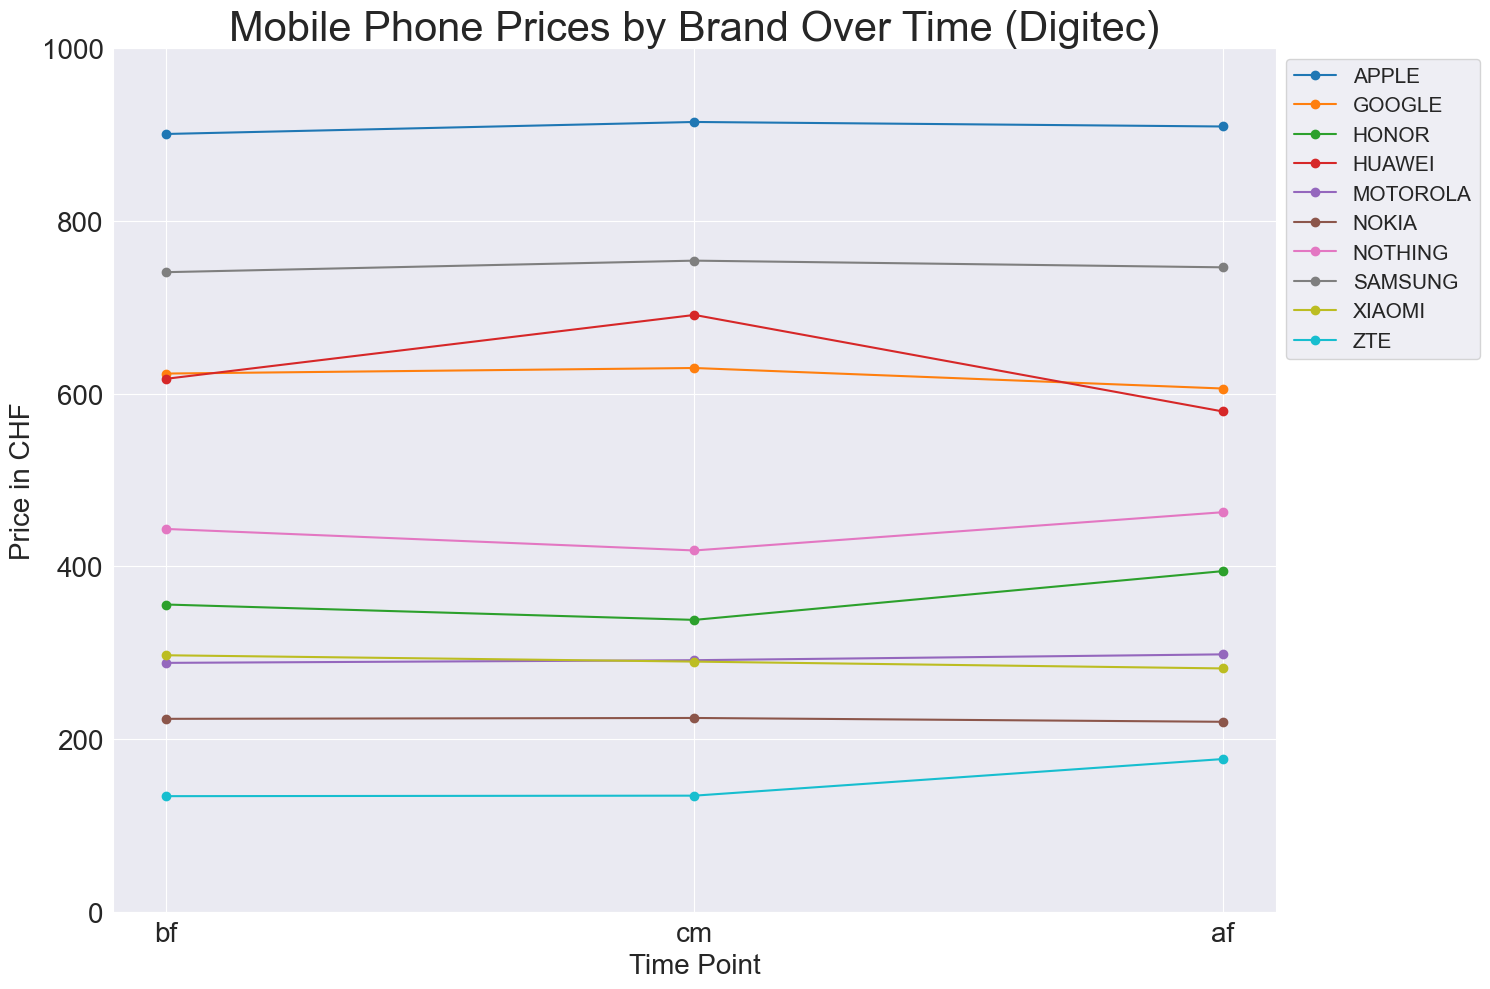

In [80]:
# Melting the DataFrame to long format for easier plotting
melted_df = df_scrapeday.melt(id_vars=['scrapeday', 'brand'], 
                    value_vars=['price_digitec_CHF_mean', 'price_digitec_CHF_min', 'price_digitec_CHF_max'],
                    var_name='Aggregation', 
                    value_name='Price')

# Splitting the aggregation into type (mean, min, max) and source (digitec, mediamarkt)
melted_df[['Aggregation_Type', 'Price_Source']] = melted_df['Aggregation'].str.split('_', expand=True).iloc[:, [2, 1]]

# filtering out digitec data in this plot
melted_df_digitec = melted_df[melted_df['Price_Source'] == 'digitec']

# Set the desired custom order for scrapeday
custom_order = ['bf', 'cm', 'af']

# Ensure that scrapeday is of type 'category' and set the custom order
melted_df_digitec['scrapeday'] = pd.Categorical(melted_df_digitec['scrapeday'], categories=custom_order, ordered=True)

# Sort the DataFrame according to the custom order and brand for consistency
melted_df_digitec.sort_values(['brand', 'scrapeday'], inplace=True)

melted_df_digitec = melted_df_digitec[melted_df_digitec["Aggregation"] == "price_digitec_CHF_mean"].copy()

#Plotting
plt.figure(figsize=(15, 10))

# Iterate over the brands for plotting
for brand in melted_df_digitec['brand'].unique():
    brand_df = melted_df_digitec[melted_df_digitec['brand'] == brand]

    # Plotting each brand as a line
    plt.plot(brand_df['scrapeday'], brand_df['Price'], label=f'{brand}', marker='o')

# Enhancing the plot
plt.xlabel('Time Point', fontsize=20)
plt.ylabel('Price in CHF', fontsize=20)
plt.title('Mobile Phone Prices by Brand Over Time (Digitec)', fontsize=30)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=15)
plt.grid(True)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylim(0, 1000)

# Display the plot with a tight layout to accommodate the legend
plt.tight_layout()
plt.show()

### Overall change

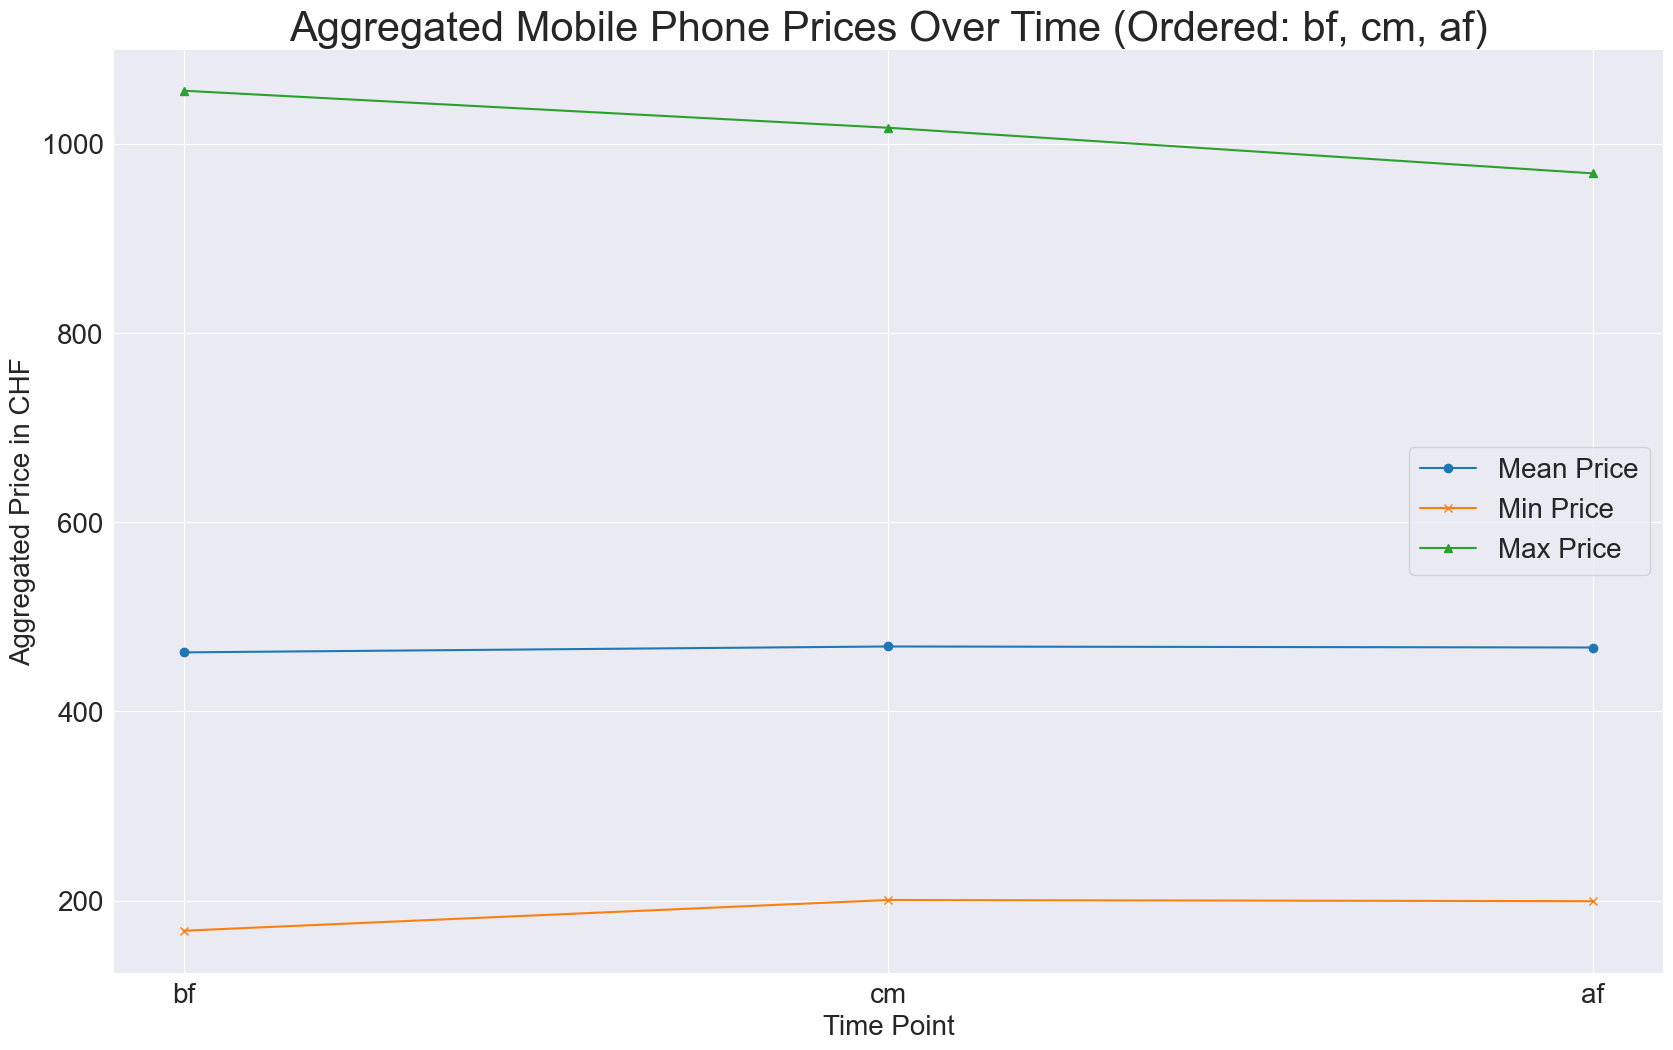

In [59]:
aggregated_data = df_scrapeday.groupby('scrapeday').agg({
    'price_digitec_CHF_mean': 'mean',
    'price_digitec_CHF_min': 'mean',
    'price_digitec_CHF_max': 'mean'
}).reset_index()

# Reordering the time points in the DataFrame as specified: bf, cm, af
time_order = ['bf', 'cm', 'af']
aggregated_data_ordered = aggregated_data.set_index('scrapeday').loc[time_order].reset_index()

# Plotting the reordered data
plt.figure(figsize=(20, 12))

# Plotting mean, min, and max aggregated prices with the new order
plt.plot(aggregated_data_ordered['scrapeday'], aggregated_data_ordered['price_digitec_CHF_mean'], label='Mean Price', marker='o')
plt.plot(aggregated_data_ordered['scrapeday'], aggregated_data_ordered['price_digitec_CHF_min'], label='Min Price', marker='x')
plt.plot(aggregated_data_ordered['scrapeday'], aggregated_data_ordered['price_digitec_CHF_max'], label='Max Price', marker='^')

# Enhancing the plot
plt.xlabel('Time Point', fontsize=20)
plt.ylabel('Aggregated Price in CHF', fontsize=20)
plt.title('Aggregated Mobile Phone Prices Over Time (Ordered: bf, cm, af)', fontsize=30)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)

# Display the plot
plt.show()

### Calculate price difference between time points

In [60]:
# Pivot the table
pivot_df = df_scrapeday[["scrapeday", "brand", "price_digitec_CHF_mean"]].pivot(index='brand', columns='scrapeday', values='price_digitec_CHF_mean')

# Calculate the price difference between the timepoints
pivot_df['BF_to_CM_diff'] = pivot_df['cm'] - pivot_df['bf']
pivot_df['CM_to_1W_diff'] = pivot_df['af'] - pivot_df['cm']
pivot_df['BF_to_1W_diff'] = pivot_df['af'] - pivot_df['bf']

pivot_df

scrapeday,af,bf,cm,BF_to_CM_diff,CM_to_1W_diff,BF_to_1W_diff
brand,,,,,,
APPLE,909.476667,900.802842,914.721190,13.918348,-5.244523,8.673825
GOOGLE,605.984722,623.315455,629.752424,6.436970,-23.767702,-17.330732
HONOR,394.495833,355.811481,338.014583,-17.796898,56.481250,38.684352
HUAWEI,579.406528,617.241444,691.217949,73.976504,-111.811421,-37.834917
MOTOROLA,298.084953,288.227900,291.322840,3.094940,6.762113,9.857053
NOKIA,219.984615,223.411429,224.413571,1.002143,-4.428956,-3.426813
NOTHING,462.714286,443.333333,418.428571,-24.904762,44.285714,19.380952
SAMSUNG,746.361760,740.742270,754.102500,13.360230,-7.740740,5.619490
XIAOMI,281.793186,297.033272,289.693550,-7.339722,-7.900364,-15.240085


In [61]:
# Create pivot tables
mean_pivot = df_scrapeday.pivot(index='brand', columns='scrapeday', values='price_digitec_CHF_mean')
min_pivot = df_scrapeday.pivot(index='brand', columns='scrapeday', values='price_digitec_CHF_min')
max_pivot = df_scrapeday.pivot(index='brand', columns='scrapeday', values='price_digitec_CHF_max')

# Calculate differences
for pivot in [mean_pivot, min_pivot, max_pivot]:
    pivot['BF_to_CM_diff'] = pivot['cm'] - pivot['bf']
    pivot['CM_to_1W_diff'] = pivot['af'] - pivot['cm']
    pivot['BF_to_1W_diff'] = pivot['af'] - pivot['bf']

# Combine pivot tables
combined_pivot = pd.concat([mean_pivot, min_pivot, max_pivot], 
                           keys=['mean', 'min', 'max'], 
                           axis=1)

# Flatten MultiIndex columns
combined_pivot.columns = ['_'.join(col).strip() for col in combined_pivot.columns.values]

combined_pivot = combined_pivot.reset_index()
combined_pivot

,brand,mean_af,mean_bf,mean_cm,mean_BF_to_CM_diff,mean_CM_to_1W_diff,mean_BF_to_1W_diff,min_af,min_bf,min_cm,min_BF_to_CM_diff,min_CM_to_1W_diff,min_BF_to_1W_diff,max_af,max_bf,max_cm,max_BF_to_CM_diff,max_CM_to_1W_diff,max_BF_to_1W_diff
0,APPLE,909.476667,900.802842,914.721190,13.918348,-5.244523,8.673825,432.000000,168.000000,428.000000,260.0,4.000000,264.000000,1508.000000,1523.500000,1539.862500,16.362500,-31.862500,-15.500000
1,GOOGLE,605.984722,623.315455,629.752424,6.436970,-23.767702,-17.330732,355.666667,349.000000,353.500000,4.5,2.166667,6.666667,1049.000000,1076.193333,1047.666667,-28.526667,1.333333,-27.193333
2,HONOR,394.495833,355.811481,338.014583,-17.796898,56.481250,38.684352,154.000000,151.000000,151.000000,0.0,3.000000,3.000000,898.500000,840.500000,850.500000,10.000000,48.000000,58.000000
3,HUAWEI,579.406528,617.241444,691.217949,73.976504,-111.811421,-37.834917,207.000000,219.000000,299.000000,80.0,-92.000000,-12.000000,1248.333333,2197.000000,2156.500000,-40.500000,-908.166667,-948.666667
4,MOTOROLA,298.084953,288.227900,291.322840,3.094940,6.762113,9.857053,90.975000,85.475000,87.775000,2.3,3.200000,5.500000,832.000000,709.666667,794.000000,84.333333,38.000000,122.333333
5,NOKIA,219.984615,223.411429,224.413571,1.002143,-4.428956,-3.426813,120.500000,123.000000,110.000000,-13.0,10.500000,-2.500000,512.500000,492.000000,478.000000,-14.000000,34.500000,20.500000
6,NOTHING,462.714286,443.333333,418.428571,-24.904762,44.285714,19.380952,348.000000,324.000000,324.000000,0.0,24.000000,24.000000,602.500000,579.000000,529.000000,-50.000000,73.500000,23.500000
7,SAMSUNG,746.361760,740.742270,754.102500,13.360230,-7.740740,5.619490,120.333333,121.666667,119.666667,-2.0,0.666667,-1.333333,1732.613333,1668.383333,1487.296667,-181.086667,245.316667,64.230000
8,XIAOMI,281.793186,297.033272,289.693550,-7.339722,-7.900364,-15.240085,80.200000,79.050000,78.750000,-0.3,1.450000,1.150000,905.000000,1259.000000,1079.000000,-180.000000,-174.000000,-354.000000
9,ZTE,176.831250,133.850000,134.433333,0.583333,42.397917,42.981250,84.600000,60.900000,54.400000,-6.5,30.200000,23.700000,399.000000,216.000000,208.000000,-8.000000,191.000000,183.000000


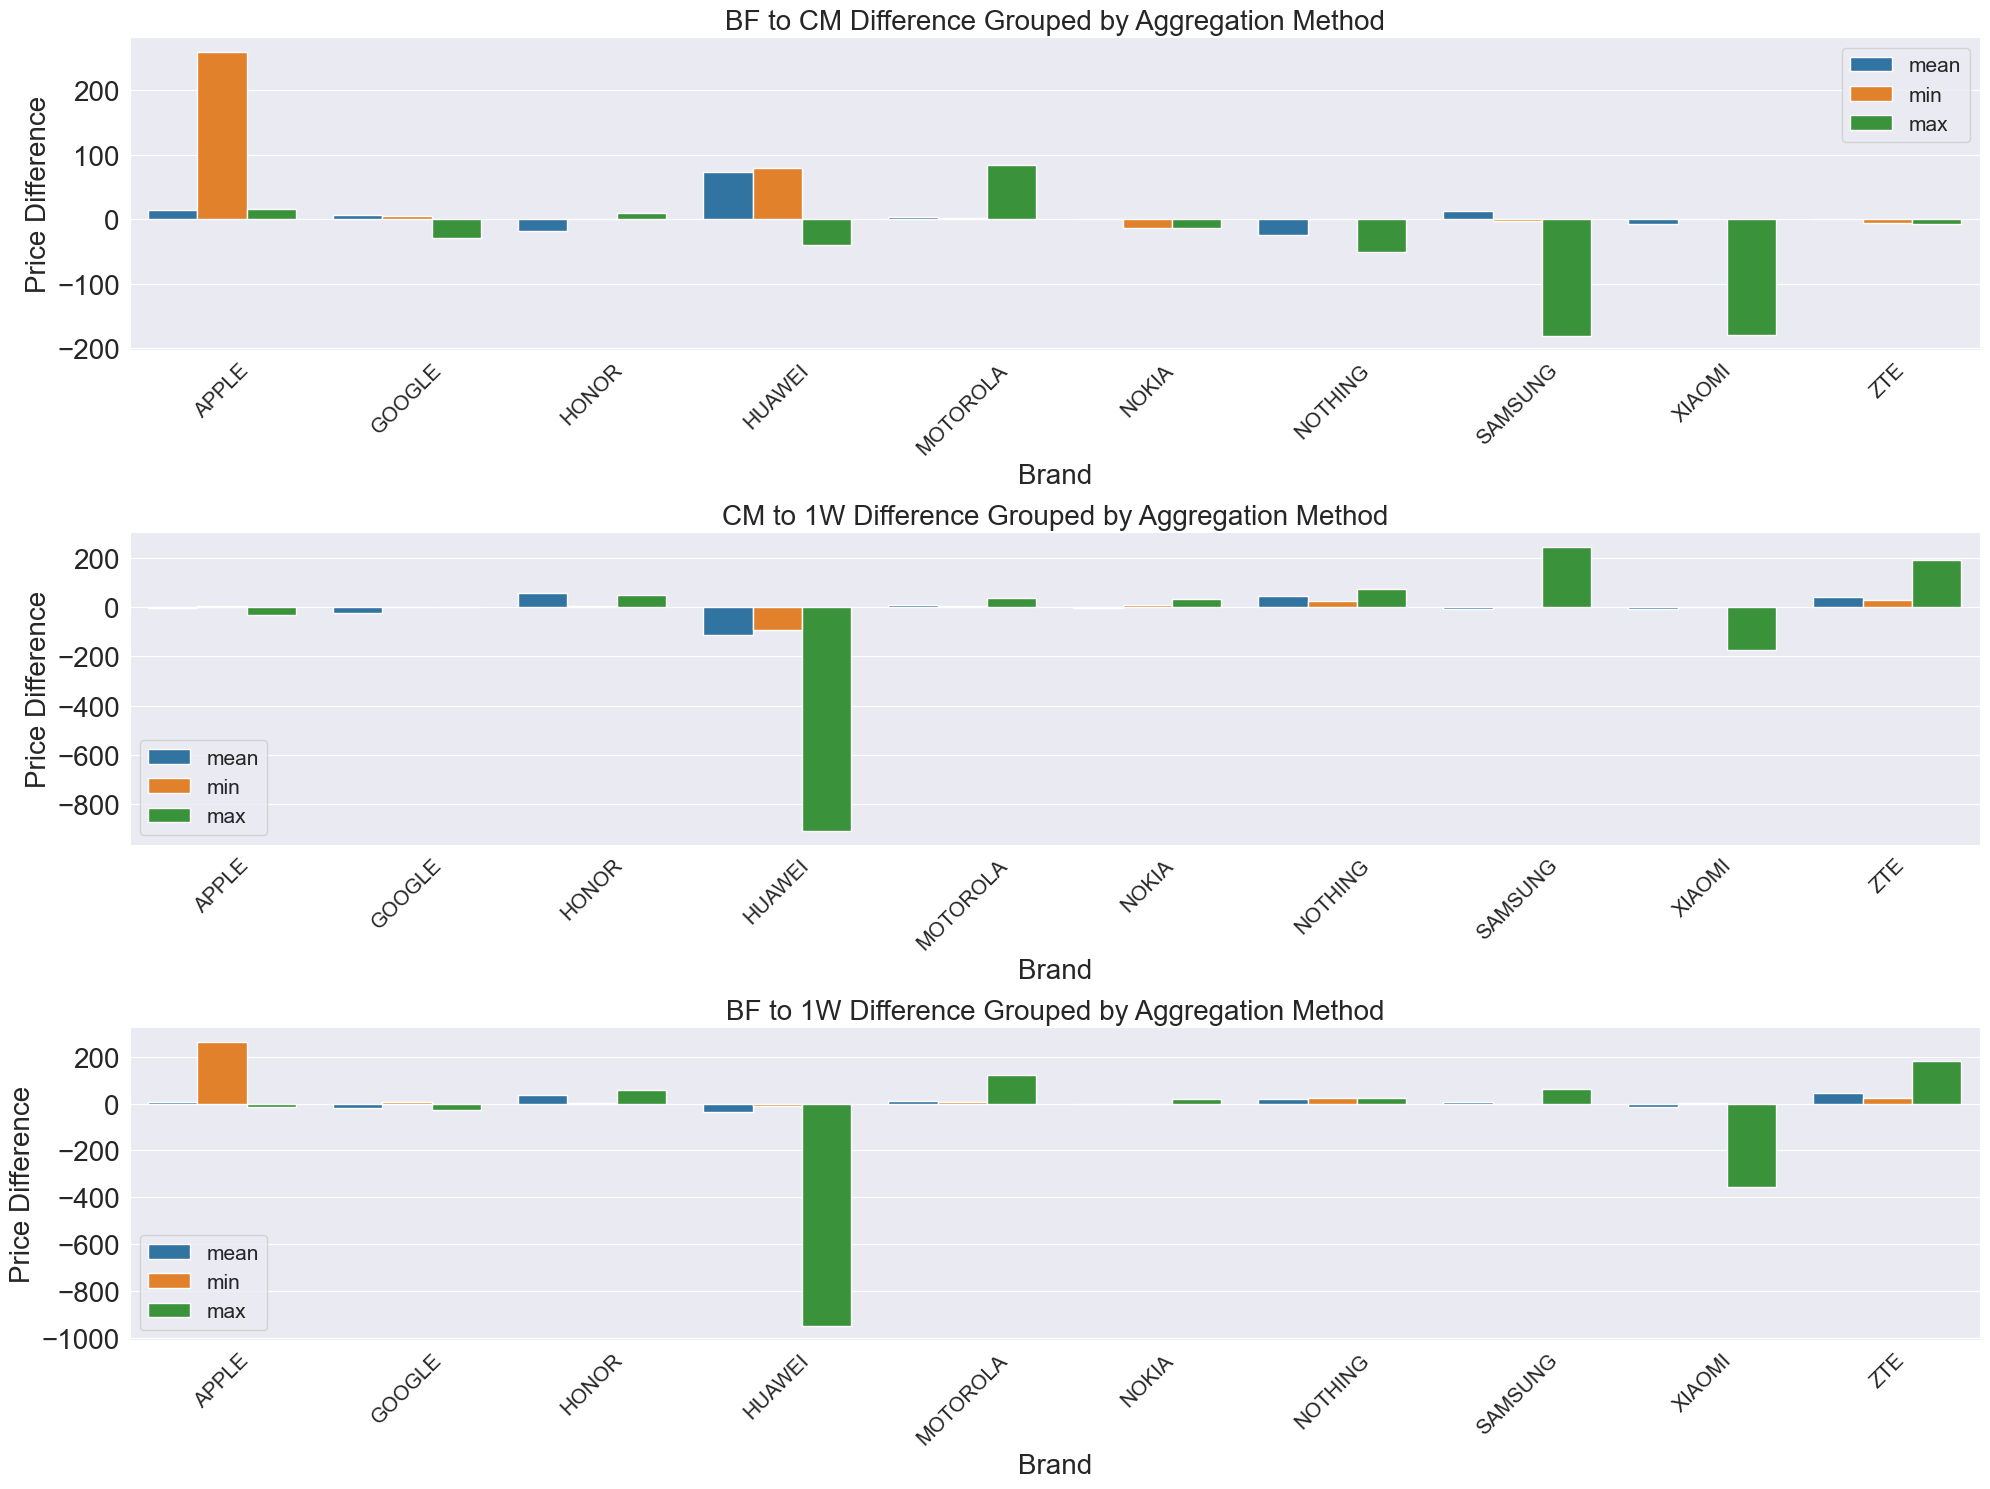

In [62]:
# Filtering and transforming the data for each of the three difference metrics
# 1. BF to CM diff
# 2. CM to 1W diff
# 3. BF to 1W diff

# Selecting columns for the different metrics
diff_columns = ['brand', 'mean_BF_to_CM_diff', 'min_BF_to_CM_diff', 'max_BF_to_CM_diff',
                'mean_CM_to_1W_diff', 'min_CM_to_1W_diff', 'max_CM_to_1W_diff',
                'mean_BF_to_1W_diff', 'min_BF_to_1W_diff', 'max_BF_to_1W_diff']

# Melting the DataFrame for the difference metrics
melted_diff_df = combined_pivot[diff_columns].melt(id_vars='brand', var_name='metric', value_name='value')

# Splitting the 'metric' column to get aggregation method and difference type
melted_diff_df[['aggregation', 'diff_type']] = melted_diff_df['metric'].str.split('_', n=1, expand=True)

# Dropping the original 'metric' column
melted_diff_df.drop('metric', axis=1, inplace=True)

# Creating grouped bar plots for each difference type
plt.figure(figsize=(20, 15))

# Plot for BF to CM diff
plt.subplot(3, 1, 1)
bf_cm_diff_data = melted_diff_df[melted_diff_df['diff_type'] == 'BF_to_CM_diff']
sns.barplot(x='brand', y='value', hue='aggregation', data=bf_cm_diff_data)
plt.title('BF to CM Difference Grouped by Aggregation Method', fontsize=20)
plt.xlabel('Brand', fontsize=20)
plt.ylabel('Price Difference', fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=20)
plt.legend(fontsize=15)

# Plot for CM to 1W diff
plt.subplot(3, 1, 2)
cm_1w_diff_data = melted_diff_df[melted_diff_df['diff_type'] == 'CM_to_1W_diff']
sns.barplot(x='brand', y='value', hue='aggregation', data=cm_1w_diff_data)
plt.title('CM to 1W Difference Grouped by Aggregation Method', fontsize=20)
plt.xlabel('Brand', fontsize=20)
plt.ylabel('Price Difference', fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=20)
plt.legend(fontsize=15)

# Plot for BF to 1W diff
plt.subplot(3, 1, 3)
bf_1w_diff_data = melted_diff_df[melted_diff_df['diff_type'] == 'BF_to_1W_diff']
sns.barplot(x='brand', y='value', hue='aggregation', data=bf_1w_diff_data)
plt.title('BF to 1W Difference Grouped by Aggregation Method', fontsize=20)
plt.xlabel('Brand', fontsize=20)
plt.ylabel('Price Difference', fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=20)
plt.legend(fontsize=15)

# Adjusting layout
plt.tight_layout()
plt.show()

### Do the same for mediamarkt

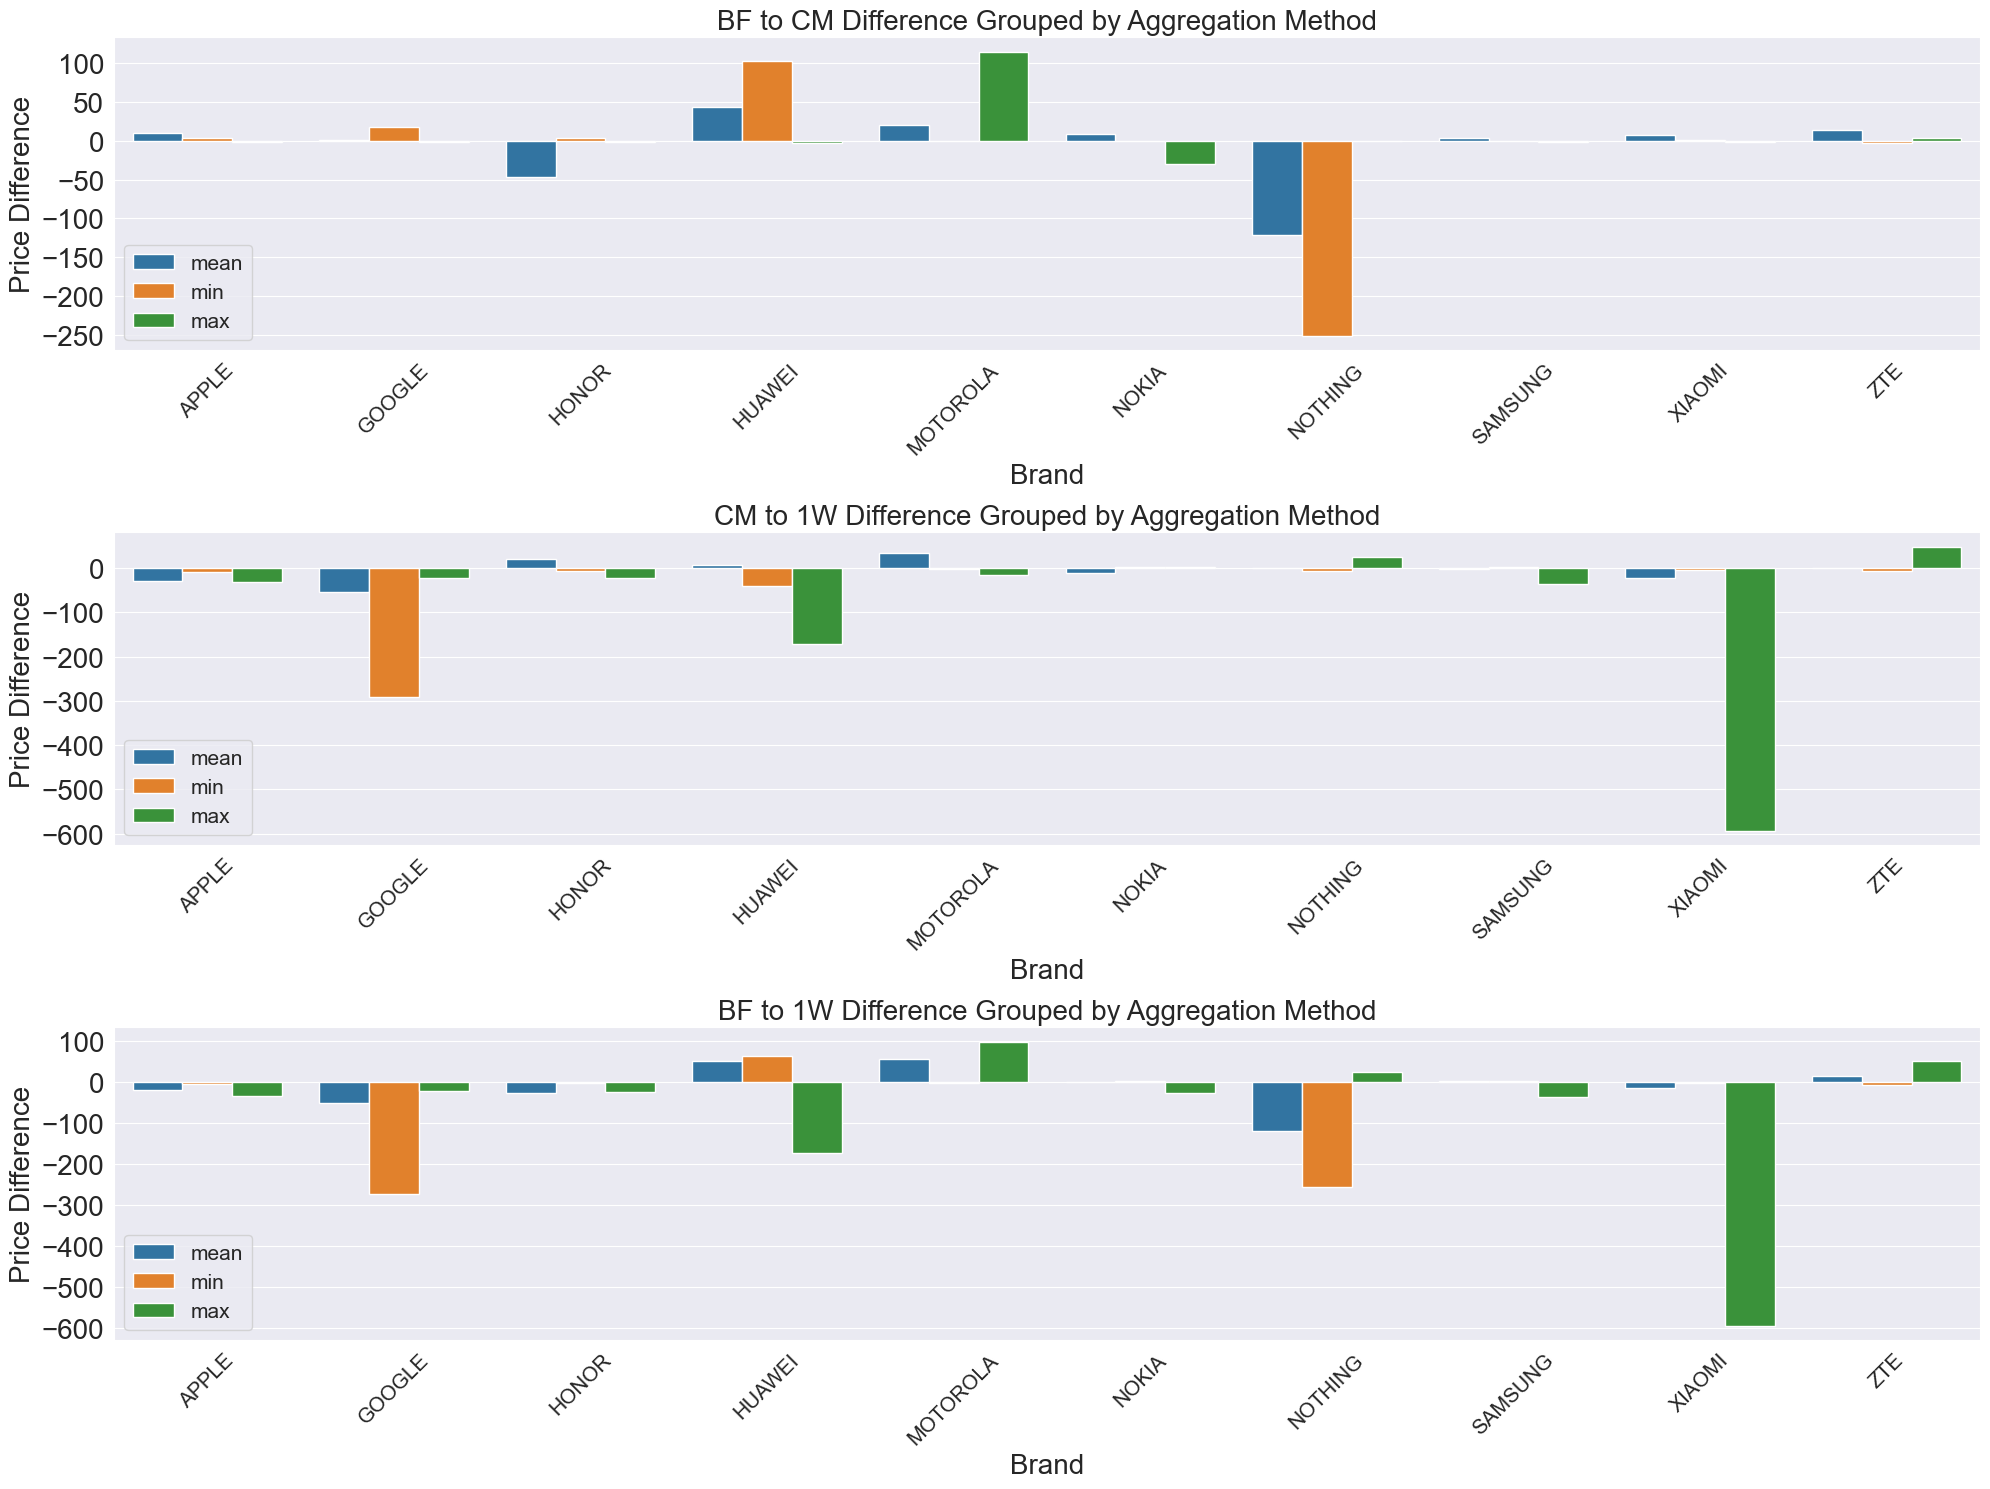

In [63]:
# Create pivot tables
mean_pivot = df_scrapeday.pivot(index='brand', columns='scrapeday', values='price_mediamarkt_CHF_mean')
min_pivot = df_scrapeday.pivot(index='brand', columns='scrapeday', values='price_mediamarkt_CHF_min')
max_pivot = df_scrapeday.pivot(index='brand', columns='scrapeday', values='price_mediamarkt_CHF_max')

# Calculate differences
for pivot in [mean_pivot, min_pivot, max_pivot]:
    pivot['BF_to_CM_diff'] = pivot['cm'] - pivot['bf']
    pivot['CM_to_1W_diff'] = pivot['af'] - pivot['cm']
    pivot['BF_to_1W_diff'] = pivot['af'] - pivot['bf']

# Combine pivot tables
combined_pivot = pd.concat([mean_pivot, min_pivot, max_pivot],
                           keys=['mean', 'min', 'max'],
                           axis=1)

# Flatten MultiIndex columns
combined_pivot.columns = ['_'.join(col).strip() for col in combined_pivot.columns.values]

combined_pivot = combined_pivot.reset_index()

# Filtering and transforming the data for each of the three difference metrics
# 1. BF to CM diff
# 2. CM to 1W diff
# 3. BF to 1W diff

# Selecting columns for the different metrics
diff_columns = ['brand', 'mean_BF_to_CM_diff', 'min_BF_to_CM_diff', 'max_BF_to_CM_diff',
                'mean_CM_to_1W_diff', 'min_CM_to_1W_diff', 'max_CM_to_1W_diff',
                'mean_BF_to_1W_diff', 'min_BF_to_1W_diff', 'max_BF_to_1W_diff']

# Melting the DataFrame for the difference metrics
melted_diff_df = combined_pivot[diff_columns].melt(id_vars='brand', var_name='metric', value_name='value')

# Splitting the 'metric' column to get aggregation method and difference type
melted_diff_df[['aggregation', 'diff_type']] = melted_diff_df['metric'].str.split('_', n=1, expand=True)

# Dropping the original 'metric' column
melted_diff_df.drop('metric', axis=1, inplace=True)

# Creating grouped bar plots for each difference type
plt.figure(figsize=(20, 15))

# Plot for BF to CM diff
plt.subplot(3, 1, 1)
bf_cm_diff_data = melted_diff_df[melted_diff_df['diff_type'] == 'BF_to_CM_diff']
sns.barplot(x='brand', y='value', hue='aggregation', data=bf_cm_diff_data)
plt.title('BF to CM Difference Grouped by Aggregation Method', fontsize=20)
plt.xlabel('Brand', fontsize=20)
plt.ylabel('Price Difference', fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=20)
plt.legend(fontsize=15)

# Plot for CM to 1W diff
plt.subplot(3, 1, 2)
cm_1w_diff_data = melted_diff_df[melted_diff_df['diff_type'] == 'CM_to_1W_diff']
sns.barplot(x='brand', y='value', hue='aggregation', data=cm_1w_diff_data)
plt.title('CM to 1W Difference Grouped by Aggregation Method', fontsize=20)
plt.xlabel('Brand', fontsize=20)
plt.ylabel('Price Difference', fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=20)
plt.legend(fontsize=15)

# Plot for BF to 1W diff
plt.subplot(3, 1, 3)
bf_1w_diff_data = melted_diff_df[melted_diff_df['diff_type'] == 'BF_to_1W_diff']
sns.barplot(x='brand', y='value', hue='aggregation', data=bf_1w_diff_data)
plt.title('BF to 1W Difference Grouped by Aggregation Method', fontsize=20)
plt.xlabel('Brand', fontsize=20)
plt.ylabel('Price Difference', fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=20)
plt.legend(fontsize=15)

# Adjusting layout
plt.tight_layout()
plt.show()

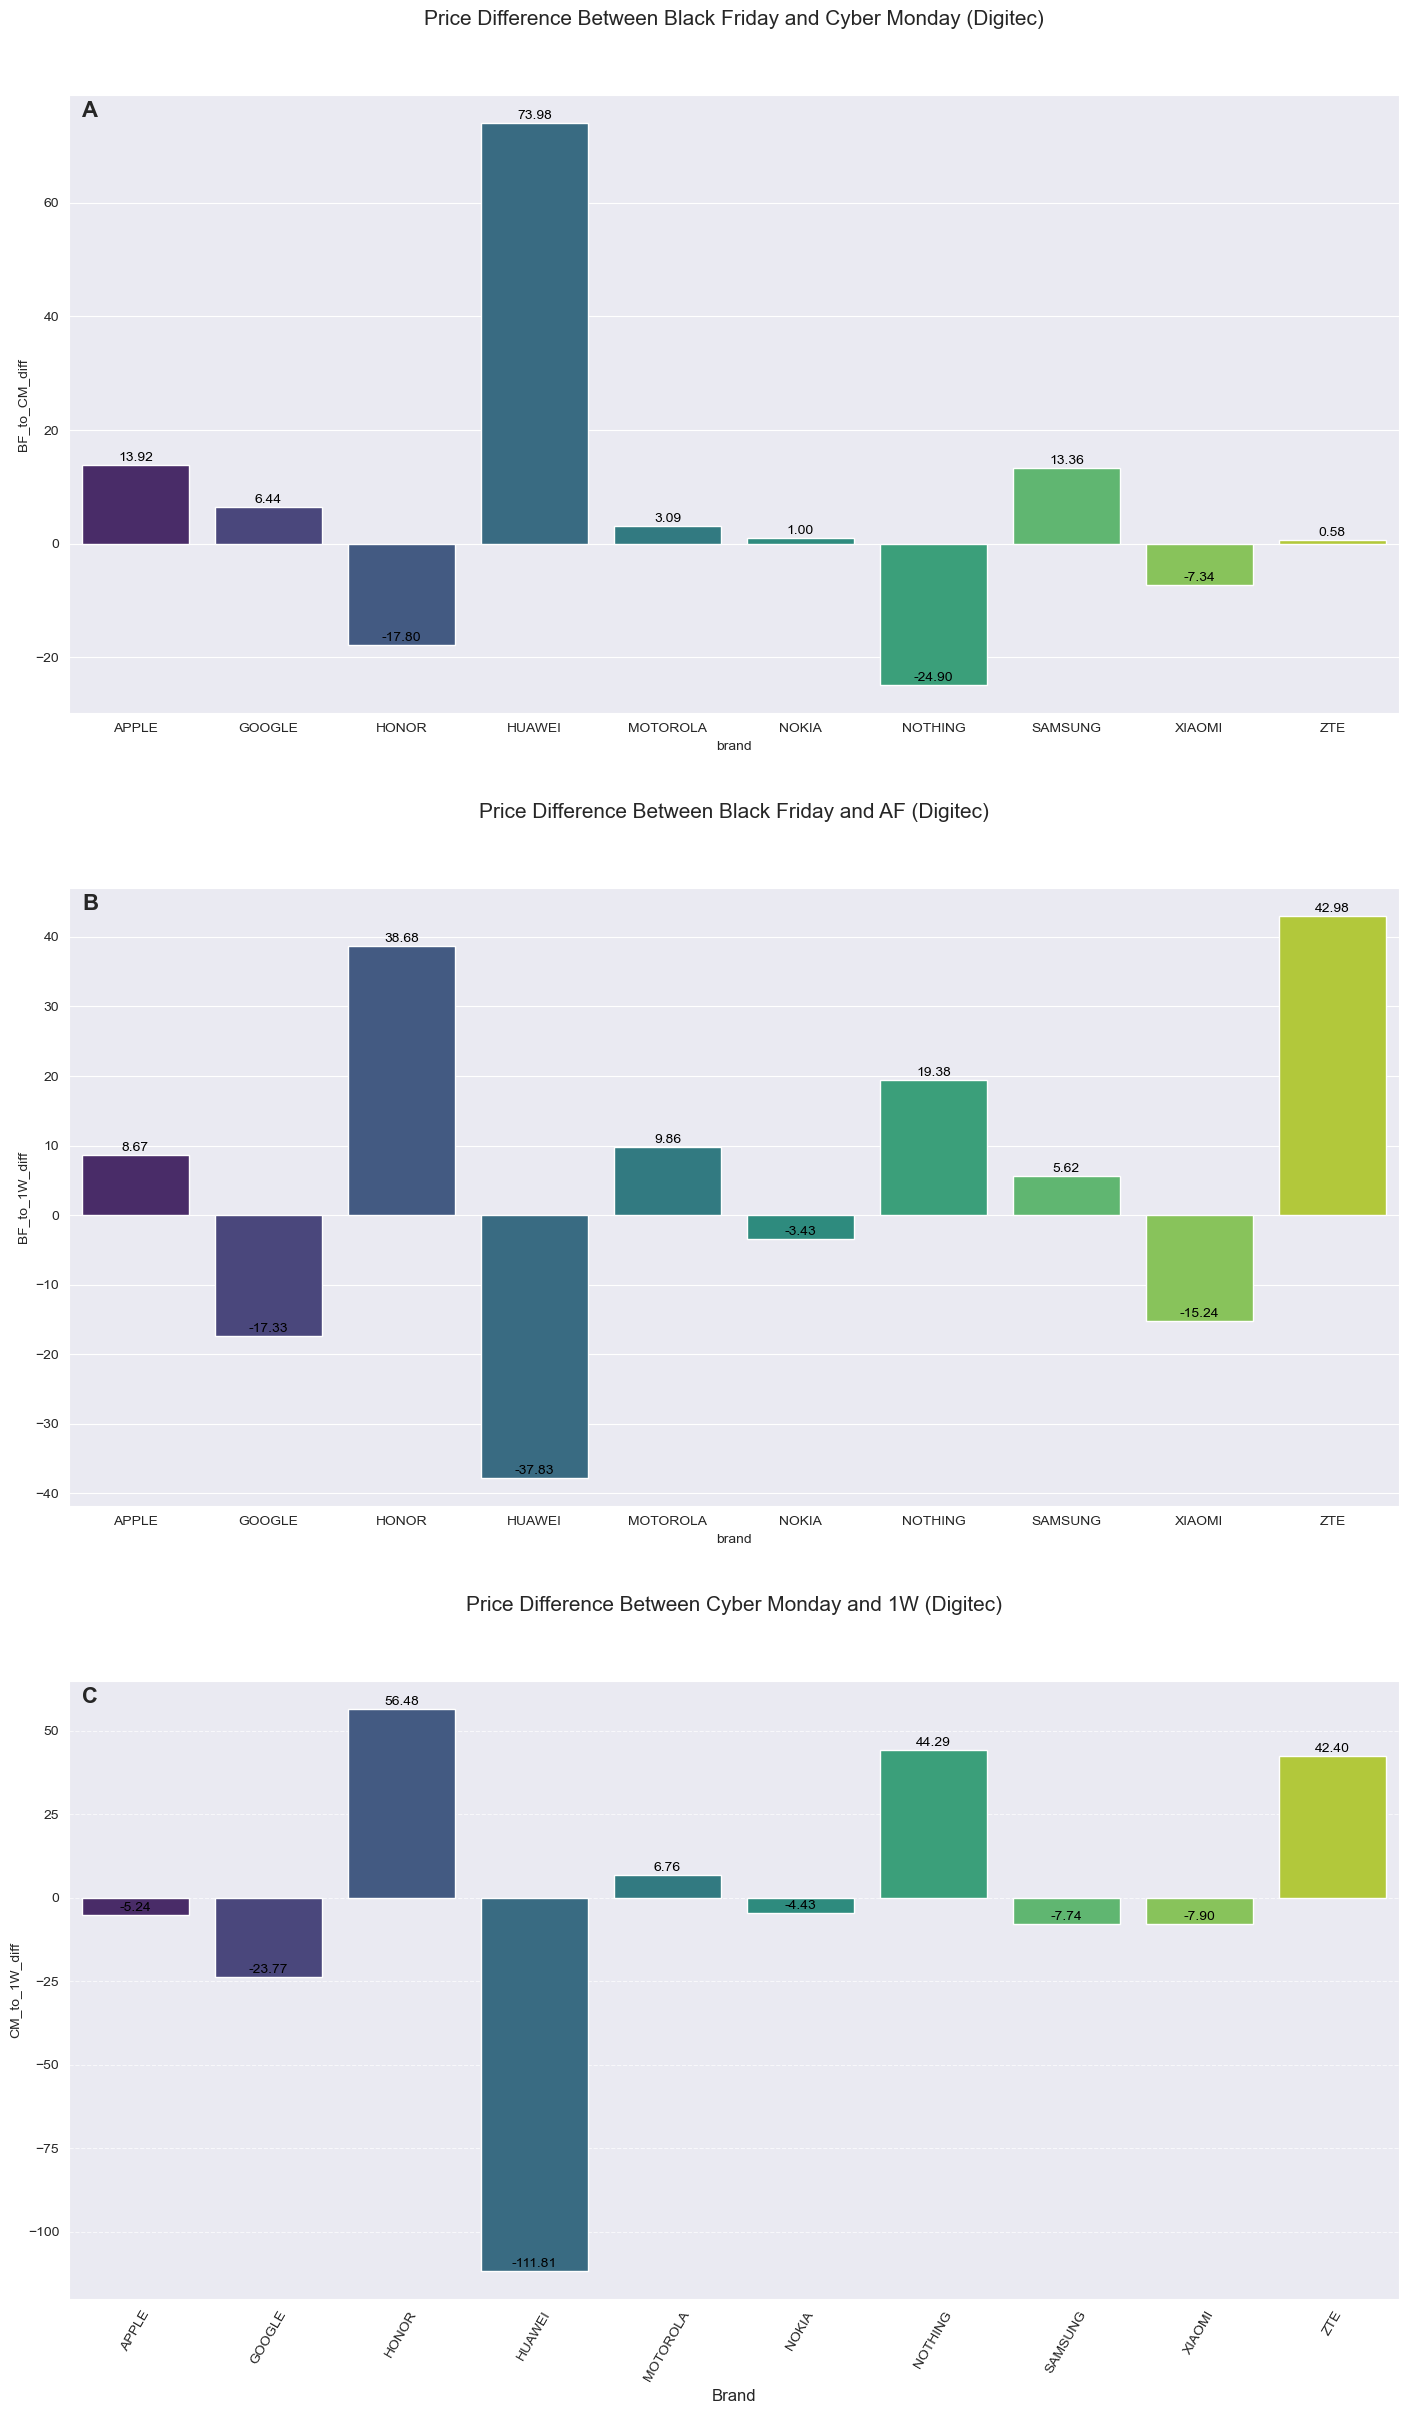

In [274]:
def plot_difference(data: pd.DataFrame, x_axis: pd.Index, y_axis: str, title: str, ax) -> None:
    #plt.figure(figsize=(15, 6))
    barplot = sns.barplot(x=x_axis, y=y_axis, data=data, palette="viridis", ax=ax)
    #plt.title(title, fontsize=15, y=1.1)
    ax.set_title(title, fontsize=15, y=1.1)
    plt.xlabel('Brand', fontsize=12)
    #plt.ylabel('Price Difference in CHF', fontsize=12)
    plt.xticks(rotation=60)
    
    # Adding value labels
    for p in barplot.patches:
        barplot.annotate(f'{p.get_height():.2f}', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', 
                         fontsize=10, 
                         color='black', 
                         xytext=(0, 5), 
                         textcoords='offset points')
    
    # Adding gridlines 
    plt.grid(axis='y', linestyle='--', alpha=0.7)

fig, axs = plt.subplots(3, figsize=(15, 25))
plot_difference(pivot_df, pivot_df.index, 'BF_to_CM_diff', 'Price Difference Between Black Friday and Cyber Monday (Digitec)', axs[0])
axs[0].annotate('A', xy=(0.01, 0.99), xycoords='axes fraction', fontsize=16, 
                fontweight='bold', va='top')
plot_difference(pivot_df, pivot_df.index, 'BF_to_1W_diff', 'Price Difference Between Black Friday and AF (Digitec)', axs[1])
axs[1].annotate('B', xy=(0.01, 0.99), xycoords='axes fraction', fontsize=16, 
                fontweight='bold', va='top')
plot_difference(pivot_df, pivot_df.index, 'CM_to_1W_diff', 'Price Difference Between Cyber Monday and 1W (Digitec)', axs[2])
axs[2].annotate('C', xy=(0.01, 0.99), xycoords='axes fraction', fontsize=16, 
                fontweight='bold', va='top')
plt.tight_layout(pad=4)
plt.show()

# 4. Frage: Wie unterscheiden sich die Lieferzeiten der beliebtesten Marken?

In [39]:
df_top_brands["delivery_time_days_digitec"] = pd.to_numeric(df_top_brands["delivery_time_days_digitec"], errors='coerce')

df_top_brands.groupby(['brand'], as_index=False).aggregate(
    delivery_digitec_mean=('delivery_time_days_digitec', 'mean'),
    delivery_digitec_min=('delivery_time_days_digitec', 'min'),
    delivery_digitec_max=('delivery_time_days_digitec', 'max'),
    delivery_mediamarkt_mean=('delivery_time_days_mediamarkt', 'mean'),
    delivery_mediamarkt_min=('delivery_time_days_mediamarkt', 'min'),
    delivery_mediamarkt_max=('delivery_time_days_mediamarkt', 'max')
)

,brand,delivery_digitec_mean,delivery_digitec_min,delivery_digitec_max,delivery_mediamarkt_mean,delivery_mediamarkt_min,delivery_mediamarkt_max
0,APPLE,1.483221,1.0,13.0,0.900000,0.0,6.0
1,GOOGLE,1.000000,1.0,1.0,3.338235,0.5,24.0
2,HONOR,4.695652,1.0,34.0,1.434783,0.0,3.0
3,HUAWEI,4.350000,1.0,19.0,2.750000,0.5,6.0
4,MOTOROLA,1.840909,1.0,19.0,1.420455,0.0,5.0
5,NOKIA,6.317073,1.0,38.0,2.170732,0.0,7.0
6,NOTHING,1.000000,1.0,1.0,1.647059,1.0,3.0
7,SAMSUNG,2.153846,1.0,31.0,1.346154,0.0,5.5
8,XIAOMI,4.383966,1.0,40.0,2.000000,0.0,6.0
9,ZTE,7.200000,1.0,18.0,3.650000,0.0,14.0


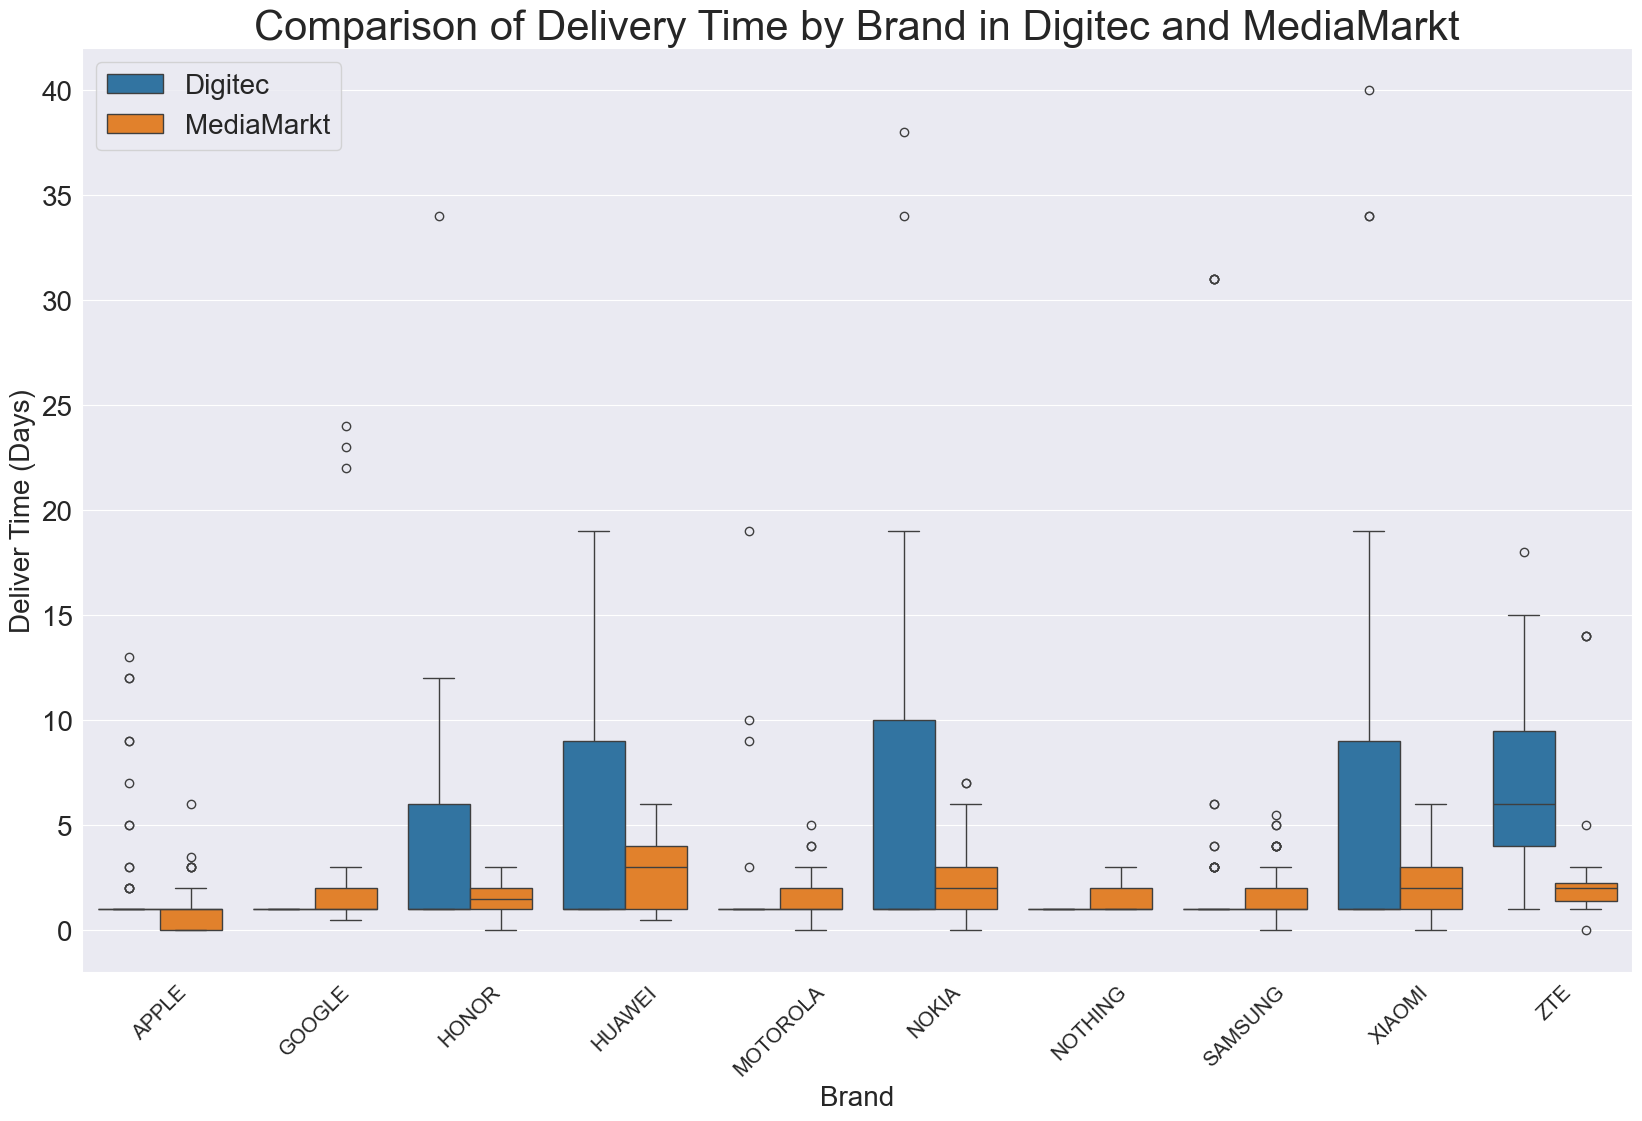

In [42]:
# Melting the DataFrame to get a long format suitable for seaborn boxplot
melted_delivery = df_top_brands.melt(id_vars=['brand'], 
                                value_vars=['delivery_time_days_digitec', 'delivery_time_days_mediamarkt'],
                                var_name='Store', 
                                value_name='Delivery_Time')

melted_delivery = melted_delivery.dropna(subset=['Delivery_Time']).copy()

# Replacing the column names for better readability in the plot
melted_delivery['Store'] = melted_delivery['Store'].replace({'delivery_time_days_digitec': 'Digitec', 'delivery_time_days_mediamarkt': 'MediaMarkt'})

# Creating the grouped boxplots
plt.figure(figsize=(20, 12))
sns.boxplot(x='brand', y='Delivery_Time', hue='Store', data=melted_delivery)

# Enhancing the plot
plt.title('Comparison of Delivery Time by Brand in Digitec and MediaMarkt', fontsize=30)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=20)
plt.xlabel('Brand', fontsize=20)
plt.ylabel('Deliver Time (Days)', fontsize=20)
plt.legend(fontsize=20, loc="upper left")

# Display the plot
plt.show()

### ANOVA Test (Statistical Significance)

In [249]:
#perform anova
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Delivery_Time ~ C(brand) + C(Store) + C(brand):C(Store)', data=melted_delivery).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(brand),1699.528556,9.0,13.043854,3.298960e-20
C(Store),780.213099,1.0,53.893104,3.501062e-13
C(brand):C(Store),720.872993,9.0,5.532688,1.602540e-07
Residual,21150.968547,1461.0,NaN,NaN


In [84]:
#post hoc test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

melted_delivery['brand'] = melted_delivery['brand'].astype('category')
melted_delivery['Store'] = melted_delivery['Store'].astype('category')

tukey = pairwise_tukeyhsd(endog=melted_delivery['Delivery_Time'], groups=melted_delivery['brand'], alpha=0.05)
print(tukey.summary())

tukey = pairwise_tukeyhsd(endog=melted_delivery['Delivery_Time'], groups=melted_delivery['Store'], alpha=0.05)
print(tukey.summary())

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
   APPLE   GOOGLE   1.0007 0.6763 -0.6774  2.6788  False
   APPLE    HONOR   1.8794 0.0753 -0.0878  3.8465  False
   APPLE   HUAWEI   2.3641 0.0001  0.8017  3.9266   True
   APPLE MOTOROLA   0.4448 0.9953 -1.0603    1.95  False
   APPLE    NOKIA    3.058    0.0  1.5108  4.6053   True
   APPLE  NOTHING   0.1377    1.0 -2.1108  2.3862  False
   APPLE  SAMSUNG   0.5641 0.7946 -0.4862  1.6145  False
   APPLE   XIAOMI   1.9912    0.0  1.0798  2.9026   True
   APPLE      ZTE   4.2391    0.0  2.1478  6.3305   True
  GOOGLE    HONOR   0.8787 0.9768 -1.5022  3.2595  False
  GOOGLE   HUAWEI   1.3634 0.5291 -0.6957  3.4226  False
  GOOGLE MOTOROLA  -0.5559 0.9972 -2.5719  1.4602  False
  GOOGLE    NOKIA   2.0573 0.0478  0.0097   4.105   True
  GOOGLE  NOTHING   -0.863 0.9894 -3.4812  1.7551  False
  GOOGLE  SAMSUNG  -0.4366 0.99